# **Project Name**    -  **E-Commerce Data Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


**Objective:**

The goal of this project is to programmatically retrieve and analyze e-commerce data using an API that offers a comprehensive record of platform transactions. This dataset includes key details such as customer demographics, product information, seller profiles, payment methods, order timelines, and customer reviews. Utilizing Python’s requests library, the data will be fetched, structured, and prepared for analysis. It will then be loaded into a DataFrame using pandas to facilitate exploration and processing. This project aims to uncover insights into customer behavior, product performance, seller efficiency, and overall operational trends. By adopting an API-based approach, the project ensures dynamic and up-to-date access to critical business insights.

In [ ]:
# pip install requests

In [ ]:
# Import Librairies

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


# Base URL of the Flask application - API
BASE_URL = "http://98.70.13.15:8787"
pd.set_option('display.max_columns', None) # None --> All Columns
pd.set_option('display.max_rows', 1000)

In [ ]:
# List of all tables
requests.get(f"{BASE_URL}/ecommerce_tables").json()

[{'tables': ['customers',
   'geolocation',
   'order_items',
   'order_payments',
   'order_reviews',
   'orders',
   'product_category_names',
   'products',
   'sellers']}]

In [ ]:
# Fetch data
def data_fetch(base_url,dataset):
  try:
    df = pd.DataFrame(requests.get(f"{base_url}/ecommerce?dataset={dataset}").json())
    return df
  except:
    print(f'Error in fetching Dataset - {dataset}')


#### Fetching Data

In [ ]:
# fetch customer data
customers_df = data_fetch(base_url = BASE_URL,dataset = 'customers')
customers_df.head()

customer_city                       customer_id customer_state  \
0                 franca  06b8999e2fba1a1fbc88172c00ba8bc7             SP   
1  sao bernardo do campo  18955e83d337fd6b2def6b18a428ac77             SP   
2              sao paulo  4e7b3e00288586ebd08712fdd0374a03             SP   
3        mogi das cruzes  b2b6027bc5c5109e529d4dc6358b12c3             SP   
4               campinas  4f2d8ab171c80ec8364f7c12e35b23ad             SP   

                 customer_unique_id  customer_zip_code_prefix  
0  861eff4711a542e4b93843c6dd7febb0                     14409  
1  290c77bc529b7ac935b93aa66c333dc3                      9790  
2  060e732b5b29e8181a18229c7b0b2b5e                      1151  
3  259dac757896d24d7702b9acbbff3f3c                      8775  
4  345ecd01c38d18a9036ed96c73b8d066                     13056

In [ ]:
# fetch geolocation data
geolocation_df = data_fetch(base_url = BASE_URL,dataset = 'geolocation')
geolocation_df.head()

geolocation_city  geolocation_lat  geolocation_lng geolocation_state  \
0        sao paulo       -23.545621       -46.639292                SP   
1        sao paulo       -23.546081       -46.644820                SP   
2        sao paulo       -23.546129       -46.642951                SP   
3        sao paulo       -23.544392       -46.639499                SP   
4        sao paulo       -23.541578       -46.641607                SP   

   geolocation_zip_code_prefix  
0                         1037  
1                         1046  
2                         1046  
3                         1041  
4                         1035

In [ ]:
# fetch order items
orderitems_df=data_fetch(base_url = BASE_URL,dataset = 'order_items')
orderitems_df.head()

freight_value                          order_id  order_item_id   price  \
0          13.29  00010242fe8c5a6d1ba2dd792cb16214              1   58.90   
1          19.93  00018f77f2f0320c557190d7a144bdd3              1  239.90   
2          17.87  000229ec398224ef6ca0657da4fc703e              1  199.00   
3          12.79  00024acbcdf0a6daa1e931b038114c75              1   12.99   
4          18.14  00042b26cf59d7ce69dfabb4e55b4fd9              1  199.90   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date  
0  2017-09-19 09:45:35  
1  2017-05-03 11:05:13  
2  2018-01-18 14:48:30  
3  2018-08-15 10:10:18  
4  2017-02-13 13:57:51

In [ ]:
# fetch order payments
orderpayments_df = data_fetch(base_url = BASE_URL,dataset = 'order_payments')
orderpayments_df.head()

order_id  payment_installments  payment_sequential  \
0  b81ef226f3fe1789b1e8b2acac839d17                     8                   1   
1  a9810da82917af2d9aefd1278f1dcfa0                     1                   1   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                     1                   1   
3  ba78997921bbcdc1373bb41e913ab953                     8                   1   
4  42fdf880ba16b47b59251dd489d4441a                     2                   1   

  payment_type  payment_value  
0  credit_card          99.33  
1  credit_card          24.39  
2  credit_card          65.71  
3  credit_card         107.78  
4  credit_card         128.45

In [ ]:
# fetch order reviews
orderreviews_df = data_fetch(base_url = BASE_URL,dataset = 'order_reviews')
orderreviews_df.head()

order_id review_answer_timestamp  \
0  73fc7af87114b39712e6da79b0a377eb     2018-01-18 21:46:59   
1  a548910a1c6147796b98fdf73dbeba33     2018-03-11 03:05:13   
2  f9e4b658b201a9f2ecdecbb34bed034b     2018-02-18 14:36:24   
3  658677c97b385a9be170737859d3511b     2017-04-21 22:02:06   
4  8e6bfb81e283fa7e4f11123a3fb894f1     2018-03-02 10:26:53   

                              review_comment_message review_comment_title  \
0                                               null                 null   
1                                               null                 null   
2                                               null                 null   
3              Recebi bem antes do prazo estipulado.                 null   
4  Parabéns lojas lannister adorei comprar pela I...                 null   

  review_creation_date                         review_id  review_score  
0  2018-01-18 00:00:00  7bc2406110b926393aa56f80a40eba40             4  
1  2018-03-10 00:00:00  80e641a11e56f04c1ad469d5645fdfde             5  
2  2018-02-17 00:00:00  228ce5500dc1d8e020d8d1322874b6f0             5  
3  2017-04-21 00:00:00  e64fb393e7b32834bb789ff8bb30750e             5  
4  2018-03-01 00:00:00  f7c4243c7fe1938f181bec41a392bdeb             5

In [ ]:
# fetch order data
orders_df = data_fetch(base_url = BASE_URL,dataset = 'orders')
orders_df.head()

customer_id    order_approved_at  \
0  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
1  b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
2  41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   
3  f88197465ea7920adcdbec7375364d82  2017-11-18 19:45:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
1           2018-08-13 00:00:00  53cdb2fc8bc7dce0b6741e2150273451   
2           2018-09-04 00:00:00  47770eb9100c2d0c44946d9cf07ec65d   
3           2017-12-15 00:00:00  949d5b44dbf5de918fe9c16f97b45f8a   
4           2018-02-26 00:00:00  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  
0      2017-10-02 10:56:33    delivered  
1      2018-07-24 20:41:37    delivered  
2      2018-08-08 08:38:49    delivered  
3      2017-11-18 19:28:06    delivered  
4      2018-02-13 21:18:39    delivered

In [ ]:
# fetch product category name data
productcategoryname_df = data_fetch(base_url = BASE_URL,dataset = 'product_category_names')
productcategoryname_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
# fetch product details
products_df = data_fetch(base_url = BASE_URL,dataset = 'products')
products_df.head()

product_category_name product_description_lenght product_height_cm  \
0             perfumaria                      287.0              10.0   
1                  artes                      276.0              18.0   
2          esporte_lazer                      250.0               9.0   
3                  bebes                      261.0               4.0   
4  utilidades_domesticas                      402.0              17.0   

                         product_id product_length_cm product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5              16.0                40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f              30.0                44.0   
2  96bd76ec8810374ed1b65e291975717f              18.0                46.0   
3  cef67bcfe19066a932b7673e239eb23d              26.0                27.0   
4  9dc1a7de274444849c219cff195d0b71              20.0                37.0   

  product_photos_qty product_weight_g product_width_cm  
0                1.0            225.0             14.0  
1                1.0           1000.0             20.0  
2                1.0            154.0             15.0  
3                1.0            371.0             26.0  
4                4.0            625.0             13.0

In [ ]:
#fetch sellers data
sellers_df = data_fetch(base_url = BASE_URL,dataset = 'sellers')
sellers_df.head()

seller_city                         seller_id seller_state  \
0           campinas  3442f8959a84dea7ee197c632cb2df15           SP   
1         mogi guacu  d1b65fc7debc3361ea86b5f14c68d2e2           SP   
2     rio de janeiro  ce3ad9de960102d0677a81f5d0bb7b2d           RJ   
3          sao paulo  c0f3eea2e14555b6faeea3dd58c1b1c3           SP   
4  braganca paulista  51a04a8a6bdcb23deccc82b0b80742cf           SP   

   seller_zip_code_prefix  
0                   13023  
1                   13844  
2                   20031  
3                    4195  
4                   12914

In [ ]:
# Merging Dataframes
df = orders_df.merge(orderitems_df, on='order_id', how='inner')
df = df.merge(orderpayments_df, on='order_id', how='inner', validate='m:m')
df = df.merge(orderreviews_df, on='order_id', how='inner')
df = df.merge(products_df, on='product_id', how='inner')
df = df.merge(customers_df, on='customer_id', how='inner')
df = df.merge(sellers_df, on='seller_id', how='inner')
# on --> Key to join the dataframes

In [ ]:
# df.iloc[0,:]

In [ ]:
df.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_installments', 'payment_sequential',
       'payment_type', 'payment_value', 'review_answer_timestamp',
       'review_comment_message', 'review_comment_title',
       'review_creation_date', 'review_id', 'review_score',
       'product_category_name', 'product_description_lenght',
       'product_height_cm', 'product_length_cm', 'product_name_lenght',
       'product_photos_qty', 'product_weight_g', 'product_width_cm',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix'],
      dtype='object')

# Column Descriptions

- **customer_id**: Unique identifier for each customer.
- **order_approved_at**: Timestamp when the order was approved.
- **order_delivered_carrier_date**: Date when the order was delivered to the carrier.
- **order_delivered_customer_date**: Date when the order was delivered to the customer.
- **order_estimated_delivery_date**: Estimated delivery date for the order.
- **order_id**: Unique identifier for each order.
- **order_purchase_timestamp**: Timestamp when the order was placed.
- **order_status**: Status of the order (e.g., delivered, canceled, pending).
- **freight_value**: Shipping cost for the order.
- **order_item_id**: Identifier for the order item within a specific order.
- **price**: Price of the product in the order item.
- **product_id**: Unique identifier for each product.
- **seller_id**: Unique identifier for each seller.
- **shipping_limit_date**: Deadline for the seller to dispatch the order.
- **payment_installments**: Number of installments for payment.
- **payment_sequential**: Sequential number of the payment transaction.
- **payment_type**: Payment method used (e.g., credit card, boleto).
- **payment_value**: Total payment value for the order.
- **review_answer_timestamp**: Timestamp when the review was responded to by the company.
- **review_comment_message**: Text of the customer review comment.
- **review_comment_title**: Title of the review comment.
- **review_creation_date**: Date when the review was created.
- **review_id**: Unique identifier for each review.
- **review_score**: Rating given by the customer (e.g., 1 to 5).
- **product_category_name**: Category of the product (e.g., electronics, furniture).
- **product_description_lenght**: Length of the product description.
- **product_height_cm**: Height of the product in centimeters.
- **product_length_cm**: Length of the product in centimeters.
- **product_name_lenght**: Length of the product name.
- **product_photos_qty**: Number of photos associated with the product.
- **product_weight_g**: Weight of the product in grams.
- **product_width_cm**: Width of the product in centimeters.
- **customer_city**: City of the customer.
- **customer_state**: State of the customer.
- **customer_unique_id**: Unique identifier for each customer (different from `customer_id` for aggregated analysis).
- **customer_zip_code_prefix**: ZIP code prefix of the customer.
- **seller_city**: City of the seller.
- **seller_state**: State of the seller.
- **seller_zip_code_prefix**: ZIP code prefix of the seller.


#### Data Preparation

In [ ]:
df.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_installments', 'payment_sequential',
       'payment_type', 'payment_value', 'review_answer_timestamp',
       'review_comment_message', 'review_comment_title',
       'review_creation_date', 'review_id', 'review_score',
       'product_category_name', 'product_description_lenght',
       'product_height_cm', 'product_length_cm', 'product_name_lenght',
       'product_photos_qty', 'product_weight_g', 'product_width_cm',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix'],
      dtype='object')

In [ ]:
# In Industries --> Loading the data

In [ ]:
key_columns = ['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date',
       'payment_type', 'review_score',
       'product_category_name',
       'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix']

# We will never drop Ids which can be relevant later

In [ ]:
df_subset = df[key_columns]
# Dealing with Relevant Columns
# Operations are Faster as well less space is consumed.

In [ ]:
df_subset.head(10)

customer_id    order_approved_at  \
0  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
1  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
2  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   
5  f88197465ea7920adcdbec7375364d82  2017-11-18 19:45:59   
6  8ab97904e6daea8866dbdbc4fb7aad2c  2018-02-13 22:20:29   
7  503740e9ca751ccdda7ba28e9ab8f608  2017-07-09 22:10:13   
8  ed0271e0b7da060a393796590e7b737a  2017-04-13 13:25:17   
9  9bdf08b4b3b52b5526ff42d37d47f222  2017-05-16 13:22:11   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   
7          2017-07-11 14:58:04           2017-07-26 10:57:55   
8                         null                          null   
9          2017-05-22 10:07:46           2017-05-26 12:55:51   

  order_estimated_delivery_date                          order_id  \
0           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
1           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
2           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
3           2018-08-13 00:00:00  53cdb2fc8bc7dce0b6741e2150273451   
4           2018-09-04 00:00:00  47770eb9100c2d0c44946d9cf07ec65d   
5           2017-12-15 00:00:00  949d5b44dbf5de918fe9c16f97b45f8a   
6           2018-02-26 00:00:00  ad21c59c0840e6cb83a9ceb5573f8159   
7           2017-08-01 00:00:00  a4591c265e18cb1dcee52889e2d8acc3   
8           2017-05-09 00:00:00  136cce7faa42fdb2cefd53fdc79a6098   
9           2017-06-07 00:00:00  6514b8ad8028c9f2cc2374ded245783f   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
1      2017-10-02 10:56:33    delivered           8.72              1   29.99   
2      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   
5      2017-11-18 19:28:06    delivered          27.20              1   45.00   
6      2018-02-13 21:18:39    delivered           8.72              1   19.90   
7      2017-07-09 21:57:05    delivered          27.36              1  147.90   
8      2017-04-11 12:22:08     invoiced          16.05              1   49.90   
9      2017-05-16 13:10:30    delivered          15.17              1   59.99   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
7  060cb19345d90064d1015407193c233d  8581055ce74af1daba164fdbd55a40de   
8  a1804276d9941ac0733cfd409f5206eb  dc8798cbf453b7e0f98745e396cc5616   
9  4520766ec412348b8d4caa5e8a18c464  16090f2ca825584b5a147ab24aa30c86   

   shipping_limit_date payment_type  review_score  product_category_name  \
0  2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
1  2017-10-06 11:07:15      voucher             4 

##### Define the data

In [ ]:
# Further I am trying to Define the data
# Order Status --> delivered
# Time Filter --> None  (In general : We don't use full data --> last 2/3 years (Volume of data and objective))
# Exclusions --> None (Ex - Blacklisted Cities orders, Products, Sellers)

In [ ]:
df_subset['order_status'].value_counts()

order_status
delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
Name: count, dtype: int64

In [ ]:
df_subset = df_subset.loc[df_subset['order_status'] == 'delivered' ]
df_subset.shape

(114859, 28)

In [ ]:
df_subset.head()

customer_id    order_approved_at  \
0  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
1  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
2  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                          order_id  \
0           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
1           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
2           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
3           2018-08-13 00:00:00  53cdb2fc8bc7dce0b6741e2150273451   
4           2018-09-04 00:00:00  47770eb9100c2d0c44946d9cf07ec65d   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
1      2017-10-02 10:56:33    delivered           8.72              1   29.99   
2      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

   shipping_limit_date payment_type  review_score  product_category_name  \
0  2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
1  2017-10-06 11:07:15      voucher             4  utilidades_domesticas   
2  2017-10-06 11:07:15      voucher             4  utilidades_domesticas   
3  2018-07-30 03:24:27       boleto             4             perfumaria   
4  2018-08-13 08:55:23  credit_card             5             automotivo   

  product_height_cm product_length_cm product_weight_g product_width_cm  \
0               8.0              19.0            500.0             13.0   
1               8.0              19.0            500.0             13.0   
2               8.0              19.0            500.0             13.0   
3              13.0              19.0            400.0             19.0   
4              19.0              24.0            420.0             21.0   

  customer_city customer_state                customer_unique_id  \
0     sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
1     sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
2     sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
3     barreiras             BA  af07308b275d755c9edb36a90c618231   
4    vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix     seller_city seller_state  \
0                      3149            maua           SP   
1                      3149            maua           SP   
2                      3149            maua           SP   
3                     47813  belo horizonte           SP   
4                     75265         guariba           SP   

   seller_zip_code_prefix  
0                    9350  
1                    9350  
2                    9350  
3                   31570  
4                   14840

#####Dropping Duplicate

In [ ]:
# Dropping Duplicate
df_subset.drop_duplicates(inplace = True)
# After this operation every row has some unique value

In [ ]:
df_subset.head(10)

customer_id    order_approved_at  \
0   9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
1   9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
3   b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
4   41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   
5   f88197465ea7920adcdbec7375364d82  2017-11-18 19:45:59   
6   8ab97904e6daea8866dbdbc4fb7aad2c  2018-02-13 22:20:29   
7   503740e9ca751ccdda7ba28e9ab8f608  2017-07-09 22:10:13   
9   9bdf08b4b3b52b5526ff42d37d47f222  2017-05-16 13:22:11   
10  f54a9f0e6b351c431402b8461ea51999  2017-01-25 02:50:47   
11  31ad1d1b63eb9962463f764d4e6e0c9d  2017-07-29 12:05:32   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
1           2017-10-04 19:55:00           2017-10-10 21:25:13   
3           2018-07-26 14:31:00           2018-08-07 15:27:45   
4           2018-08-08 13:50:00           2018-08-17 18:06:29   
5           2017-11-22 13:39:59           2017-12-02 00:28:42   
6           2018-02-14 19:46:34           2018-02-16 18:17:02   
7           2017-07-11 14:58:04           2017-07-26 10:57:55   
9           2017-05-22 10:07:46           2017-05-26 12:55:51   
10          2017-01-26 14:16:31           2017-02-02 14:08:10   
11          2017-08-10 19:45:24           2017-08-16 17:14:30   

   order_estimated_delivery_date                          order_id  \
0            2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
1            2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
3            2018-08-13 00:00:00  53cdb2fc8bc7dce0b6741e2150273451   
4            2018-09-04 00:00:00  47770eb9100c2d0c44946d9cf07ec65d   
5            2017-12-15 00:00:00  949d5b44dbf5de918fe9c16f97b45f8a   
6            2018-02-26 00:00:00  ad21c59c0840e6cb83a9ceb5573f8159   
7            2017-08-01 00:00:00  a4591c265e18cb1dcee52889e2d8acc3   
9            2017-06-07 00:00:00  6514b8ad8028c9f2cc2374ded245783f   
10           2017-03-06 00:00:00  76c6e866289321a7c93b82b54852dc33   
11           2017-08-23 00:00:00  e69bfb5eb88e0ed6a785585b27e16dbf   

   order_purchase_timestamp order_status  freight_value  order_item_id  \
0       2017-10-02 10:56:33    delivered           8.72              1   
1       2017-10-02 10:56:33    delivered           8.72              1   
3       2018-07-24 20:41:37    delivered          22.76              1   
4       2018-08-08 08:38:49    delivered          19.22              1   
5       2017-11-18 19:28:06    delivered          27.20              1   
6       2018-02-13 21:18:39    delivered           8.72              1   
7       2017-07-09 21:57:05    delivered          27.36              1   
9       2017-05-16 13:10:30    delivered          15.17              1   
10      2017-01-23 18:29:09    delivered          16.05              1   
11      2017-07-29 11:55:02    delivered          19.77              1   

     price                        product_id  \
0    29.99  87285b34884572647811a353c7ac498a   
1    29.99  87285b34884572647811a353c7ac498a   
3   118.70  595fac2a385ac33a80bd5114aec74eb8   
4   159.90  aa4383b373c6aca5d8797843e5594415   
5    45.00  d0b61bfb1de832b15ba9d266ca96e5b0   
6    19.90  65266b2da20d04dbe00c5c2d3bb7859e   
7   147.90  060cb19345d90064d1015407193c233d   
9    59.99  4520766ec412348b8d4caa5e8a18c464   
10   19.90  ac1789e492dcd698c5c10b97a671243a   
11  149.99  9a78fb9862b10749a117f7fc3c31f051   

                           seller_id  shipping_limit_date payment_type  \
0   3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15  credit_card   
1   3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15      voucher   
3   289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27       boleto   
4   4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  credit_card   
5   66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59  credit_card   
6   2c9e548be18521d1c43cde1c582c6de8  2018-02-19 20:31:37  credit_card   
7   

In [ ]:
# Payment Mode - First Entry
df_subset.drop_duplicates(subset = ['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'review_score',
       'product_category_name',
       'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix'], inplace = True, keep = 'first')

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset['order_id'].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
73c8ab38f07dc94389065f7eba4f297a    14
                                    ..
8accfc040e66d8b4eac1ce4321c40911     1
2d3ee63d21894eb0e7c3879fa3f9b0d1     1
5d300afae7f792b2a15b92b523a65a8f     1
49ca036c28f05c435aa83b00e220efd9     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: count, Length: 95831, dtype: int64

In [ ]:
df_subset[df_subset['order_id'] =='8272b63d03f5f79c56e9e4120aec44ef']

customer_id    order_approved_at  \
104694  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104695  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104696  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104697  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104698  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104699  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104700  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104701  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104702  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104703  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104704  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104705  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104706  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104707  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104708  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104709  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104710  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104711  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104712  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104713  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   
104714  fc3d1daec319d62d49bfb5e1f83123e9  2017-07-17 18:25:23   

       order_delivered_carrier_date order_delivered_customer_date  \
104694          2017-07-20 15:45:53           2017-07-31 18:03:02   
104695          2017-07-20 15:45:53           2017-07-31 18:03:02   
104696          2017-07-20 15:45:53           2017-07-31 18:03:02   
104697          2017-07-20 15:45:53           2017-07-31 18:03:02   
104698          2017-07-20 15:45:53           2017-07-31 18:03:02   
104699          2017-07-20 15:45:53           2017-07-31 18:03:02   
104700          2017-07-20 15:45:53           2017-07-31 18:03:02   
104701          2017-07-20 15:45:53           2017-07-31 18:03:02   
104702          2017-07-20 15:45:53           2017-07-31 18:03:02   
104703          2017-07-20 15:45:53           2017-07-31 18:03:02   
104704          2017-07-20 15:45:53           2017-07-31 18:03:02   
104705          2017-07-20 15:45:53           2017-07-31 18:03:02   
104706          2017-07-20 15:45:53           2017-07-31 18:03:02   
104707          2017-07-20 15:45:53           2017-07-31 18:03:02   
104708          2017-07-20 15:45:53           2017-07-31 18:03:02   
104709          2017-07-20 15:45:53           2017-07-31 18:03:02   
104710          2017-07-20 15:45:53           2017-07-31 18:03:02   
104711          2017-07-20 15:45:53           2017-07-31 18:03:02   
104712          2017-07-20 15:45:53           2017-07-31 18:03:02   
104713          2017-07-20 15:45:53           2017-07-31 18:03:02   
104714          2017-07-20 15:45:53           2017-07-31 18:03:02   

       order_estimated_delivery_date                          order_id  \
104694           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104695           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104696           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104697           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104698           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104699           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104700           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104701           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104702           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104703           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104704           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104705           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104706           2017-07-28 00:00:00  8272b63d03f5f79c56e9e4120aec44ef   
104707           2017-07-28 00:00:00  8272b

#### Missing Value Treatment

Missing values happen when some data is not recorded or is left blank in a dataset.

Example: In a survey, if someone skips the question about their age, that creates a missing value.

How missing values seen in data

NaN (Not a Number) / Blank or empty cells

Placeholders like NULL, N/A, 999, or -1

Explicit text like "Unknown" or "Missing"

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset.head()

customer_id    order_approved_at  \
0  9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   
5  f88197465ea7920adcdbec7375364d82  2017-11-18 19:45:59   
6  8ab97904e6daea8866dbdbc4fb7aad2c  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0           2017-10-18 00:00:00  e481f51cbdc54678b7cc49136f2d6af7   
3           2018-08-13 00:00:00  53cdb2fc8bc7dce0b6741e2150273451   
4           2018-09-04 00:00:00  47770eb9100c2d0c44946d9cf07ec65d   
5           2017-12-15 00:00:00  949d5b44dbf5de918fe9c16f97b45f8a   
6           2018-02-26 00:00:00  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   
5      2017-11-18 19:28:06    delivered          27.20              1   45.00   
6      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

   shipping_limit_date payment_type  review_score  product_category_name  \
0  2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
3  2018-07-30 03:24:27       boleto             4             perfumaria   
4  2018-08-13 08:55:23  credit_card             5             automotivo   
5  2017-11-23 19:45:59  credit_card             5               pet_shop   
6  2018-02-19 20:31:37  credit_card             5              papelaria   

  product_height_cm product_length_cm product_weight_g product_width_cm  \
0               8.0              19.0            500.0             13.0   
3              13.0              19.0            400.0             19.0   
4              19.0              24.0            420.0             21.0   
5              10.0              30.0            450.0             20.0   
6              15.0              51.0            250.0             15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
3                barreiras             BA  af07308b275d755c9edb36a90c618231   
4               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
5  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
6              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
3                     47813   belo horizonte           SP   
4                     75265          guariba           SP   
5                     59296   belo horizonte           MG   
6                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  
0                    9350  
3                   31570  
4                   14840  
5                   31842  
6                    8752

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset.replace({"null": np.nan},inplace= True)

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109604 non-null  object 
 2   order_delivered_carrier_date   109617 non-null  object 
 3   order_delivered_customer_date  109611 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
# Percentage of Null Values
for i in df_subset.columns:
  print(f'{i} : {(df_subset[i].isna().sum()/df_subset.shape[0])*100}')

customer_id : 0.0
order_approved_at : 0.013683759202328064
order_delivered_carrier_date : 0.0018245012269770752
order_delivered_customer_date : 0.007298004907908301
order_estimated_delivery_date : 0.0
order_id : 0.0
order_purchase_timestamp : 0.0
order_status : 0.0
freight_value : 0.0
order_item_id : 0.0
price : 0.0
product_id : 0.0
seller_id : 0.0
shipping_limit_date : 0.0
payment_type : 0.0
review_score : 0.0
product_category_name : 1.3939189374104854
product_height_cm : 0.016420511042793677
product_length_cm : 0.016420511042793677
product_weight_g : 0.016420511042793677
product_width_cm : 0.016420511042793677
customer_city : 0.0
customer_state : 0.0
customer_unique_id : 0.0
customer_zip_code_prefix : 0.0
seller_city : 0.0
seller_state : 0.0
seller_zip_code_prefix : 0.0


In [ ]:
# Low percentage of null value : we drop full row
# High Percentage in certain column : Drop that specific column
# 20-30 % --> Null values : We treat the null values as per the requirement


In [ ]:
df_subset.dropna(inplace = True) # By default it will remove rows

In [ ]:
df_subset.shape

(108067, 28)

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108067 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108067 non-null  object 
 1   order_approved_at              108067 non-null  object 
 2   order_delivered_carrier_date   108067 non-null  object 
 3   order_delivered_customer_date  108067 non-null  object 
 4   order_estimated_delivery_date  108067 non-null  object 
 5   order_id                       108067 non-null  object 
 6   order_purchase_timestamp       108067 non-null  object 
 7   order_status                   108067 non-null  object 
 8   freight_value                  108067 non-null  float64
 9   order_item_id                  108067 non-null  int64  
 10  price                          108067 non-null  float64
 11  product_id                     108067 non-null  object 
 12  seller_id                      1080

In [ ]:
# Disguished Null Values : Check by unique function
# list(df_subset['customer_city'].unique())

####  Variable Engineering

In [ ]:
#
# String to Datetime
datetime_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]
for col in datetime_cols:
  print(col)
  df_subset[col] = pd.to_datetime(df_subset[col]) # format : All values were having default format %Y-%m-%d %h:%M:%s

order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
shipping_limit_date


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108067 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108067 non-null  object        
 1   order_approved_at              108067 non-null  datetime64[ns]
 2   order_delivered_carrier_date   108067 non-null  datetime64[ns]
 3   order_delivered_customer_date  108067 non-null  datetime64[ns]
 4   order_estimated_delivery_date  108067 non-null  datetime64[ns]
 5   order_id                       108067 non-null  object        
 6   order_purchase_timestamp       108067 non-null  datetime64[ns]
 7   order_status                   108067 non-null  object        
 8   freight_value                  108067 non-null  float64       
 9   order_item_id                  108067 non-null  int64         
 10  price                          108067 non-null  float64       
 11  produ

In [ ]:
# New columns -> Delivery time
df_subset['purchase_to_delivered'] = (df_subset['order_delivered_customer_date'] - df_subset['order_purchase_timestamp']).dt.days
df_subset['approved_to_delivered'] = (df_subset['order_delivered_customer_date'] - df_subset['order_approved_at']).dt.days
df_subset['carrier_to_delivered'] = (df_subset['order_delivered_customer_date'] - df_subset['order_delivered_carrier_date']).dt.days
df_subset['estimated_to_delivered'] = (df_subset['order_delivered_customer_date'] - df_subset['order_estimated_delivery_date']).dt.days



In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
5  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
6  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
3                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
4                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
5                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
6                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   
5      2017-11-18 19:28:06    delivered          27.20              1   45.00   
6      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
3 2018-07-30 03:24:27       boleto             4             perfumaria   
4 2018-08-13 08:55:23  credit_card             5             automotivo   
5 2017-11-23 19:45:59  credit_card             5               pet_shop   
6 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
3               13.0               19.0             400.0              19.0   
4               19.0               24.0             420.0              21.0   
5               10.0               30.0             450.0              20.0   
6               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
3                barreiras             BA  af07308b275d755c9edb36a90c618231   
4               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
5  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
6              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
3                     47813   belo horizonte           SP   
4                     75265          guariba           SP   
5                     59296   belo horizonte           MG   
6                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
3                   31570

In [ ]:
# On time Column
df_subset['on_time_delivery'] = df_subset['estimated_to_delivered'].apply(lambda x: 'On time' if x<=0 else 'Delayed')

In [ ]:
# Product Volume
df_subset['Product_volume'] = df_subset['product_length_cm'] * df_subset['product_height_cm'] * df_subset['product_width_cm']

In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
5  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
6  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
3                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
4                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
5                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
6                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   
5      2017-11-18 19:28:06    delivered          27.20              1   45.00   
6      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
3 2018-07-30 03:24:27       boleto             4             perfumaria   
4 2018-08-13 08:55:23  credit_card             5             automotivo   
5 2017-11-23 19:45:59  credit_card             5               pet_shop   
6 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
3               13.0               19.0             400.0              19.0   
4               19.0               24.0             420.0              21.0   
5               10.0               30.0             450.0              20.0   
6               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
3                barreiras             BA  af07308b275d755c9edb36a90c618231   
4               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
5  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
6              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
3                     47813   belo horizonte           SP   
4                     75265          guariba           SP   
5                     59296   belo horizonte           MG   
6                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
3                   31570

In [ ]:
# Creating a flag of holidays | Information Date to holidays mapping


#### Exploratory Data Analysis

##### Category 1 : Delivery time Distribution

1. Distribution of days to deliver from purchase to Delivery

2. Distribution of days to deliver from approval to Delivery

3. Distrbution of days to deliver from Carrier to Delivery

4. Distribution of Orders getting delivered within deadline or out of deadline

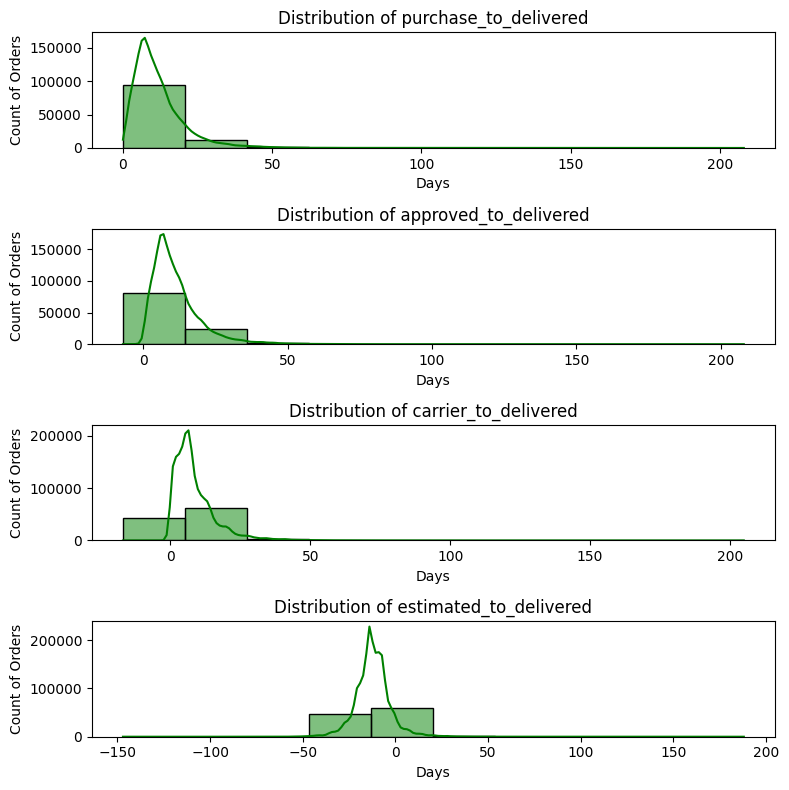

In [ ]:
# Histogram Distribution of
# "purchase_to_delivered",
# "approved_to_delivered",
# "carrier_to_delivered",
# "estimated_to_delivered"

# Create figure and axes for 4 subplots in one column
fig, axes = plt.subplots(4,1, figsize=(8, 8))

# Define the columns to plot
columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Plot each column in its own subplot
for ax, col in zip(axes, columns):
    sns.histplot(data=df_subset, x=col, kde=True, ax=ax, color="green", bins=10)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Days")
    ax.set_ylabel("Count of Orders")

plt.tight_layout()
plt.show()

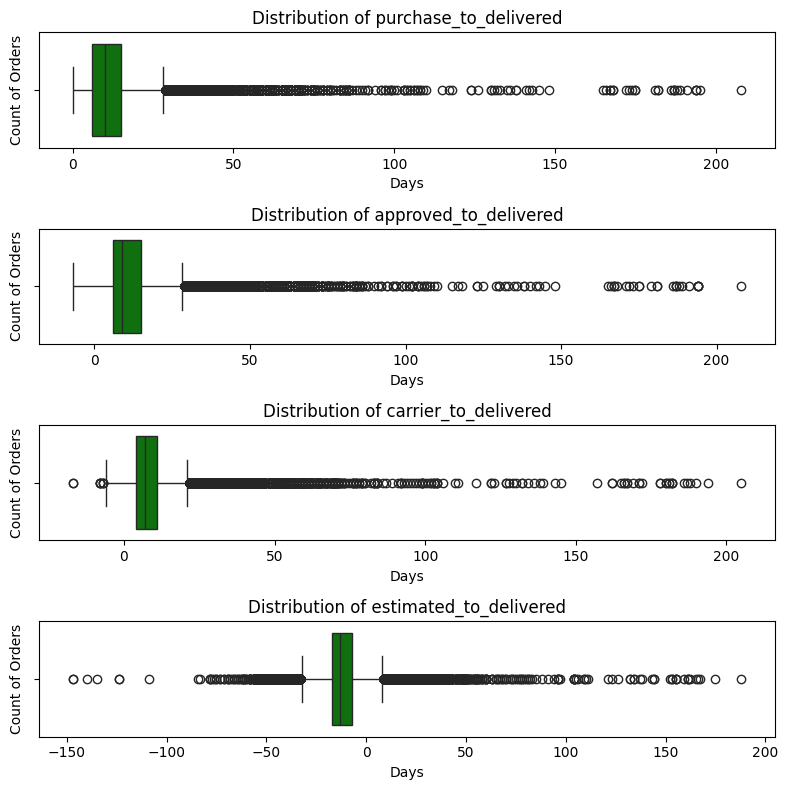

In [ ]:
# Boxplot Distribution of
# "purchase_to_delivered",
# "approved_to_delivered",
# "carrier_to_delivered",
# "estimated_to_delivered"

# Create figure and axes for 4 subplots in one column
fig, axes = plt.subplots(4,1, figsize=(8, 8))

# Define the columns to plot
columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Plot each column in its own subplot
for ax, col in zip(axes, columns):
    sns.boxplot(data=df_subset, x=col, ax=ax, color="green")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Days")
    ax.set_ylabel("Count of Orders")

plt.tight_layout()
plt.show()

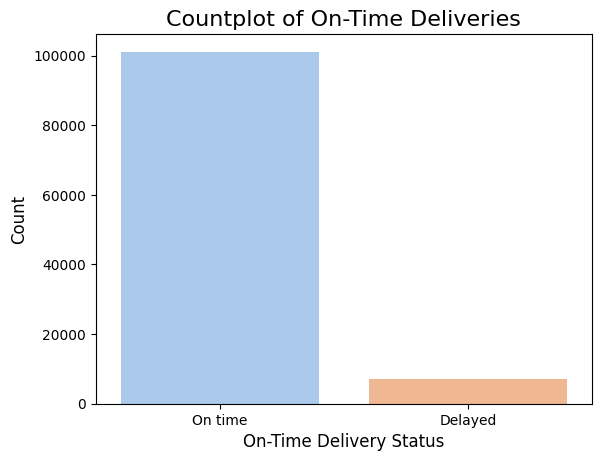

In [ ]:
# On time Delivery
sns.countplot(data=df_subset, x='on_time_delivery', palette='pastel')

# Adding titles and labels
plt.title('Countplot of On-Time Deliveries', fontsize=16)
plt.xlabel('On-Time Delivery Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

Take Aways -
1. Data Inconsistency for Carrier to Delivered, Approved to Delivered.

2. Potential Outliers and distributed widely

3. Most of the deliveries are on On time | Analysis Focus should be on Delayed

###### Investigation on Data Inconsistency

In [ ]:
# Check rows where Data is inconsistent
# Check with Business - Why this case is present in the dataset?
df_subset.loc[(df_subset['approved_to_delivered']<0) | (df_subset['carrier_to_delivered']<0)  ]

In [ ]:
# Investigation -->
df_subset.loc[(df_subset['approved_to_delivered']<0) | (df_subset['carrier_to_delivered']<0)  ].shape
# Very few Cases - 116 : will drop from the Data

(116, 34)

In [ ]:
df_subset = df_subset.loc[(df_subset['approved_to_delivered']>=0) & (df_subset['carrier_to_delivered']>=0)  ]

In [ ]:
df_subset.shape

(107951, 34)

##### Outlier Treatment/Marking

In [ ]:
# Outlier Treatment Inter Quartile Range

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
def outlier_marking(data, column_name):
  Q1 = data[column_name].quantile(0.25) # Calculate the percentile
  Q3 = data[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Determine the bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Flag outliers
  return data[column_name].apply(
      lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Not Outlier'
  )


In [ ]:
# approved_to_delivered
df_subset['approved_to_delivered'].quantile(0.25) # Q1
# 6 days --> 25 % percentile | 25% orders are delivered after approval before 6 days

6.0

In [ ]:
df_subset['approved_to_delivered'].quantile(0.75) # Q3
# 15 days --> 75 % Percentile | 75% orders are delivered after approval before 15

15.0

In [ ]:
iqr = 15-6 # Q3-Q1

In [ ]:
lower_bound = 6 - 1.5 * iqr
upper_bound = 15 + 1.5 * iqr
# Normal Data Range is between lower bound and upper bound
print(lower_bound)
print(upper_bound)

-7.5
28.5


In [ ]:
df_subset[df_subset['approved_to_delivered']>28.5].shape

(5056, 34)

In [ ]:
df_subset[df_subset['approved_to_delivered']>28.5]

customer_id   order_approved_at  \
35      761df82feda9778854c6dafdaeb567e4 2018-02-25 14:47:35   
41      5f16605299d698660e0606f7eae2d2f9 2018-02-17 16:15:34   
47      c7340080e394356141681bd4c9b8fe31 2017-11-25 00:21:09   
117     68451b39b1314302c08c65a29f1140fc 2017-11-22 11:46:50   
131     d4faa220408c20e53595d2950f361f3b 2017-12-01 09:31:15   
...                                  ...                 ...   
116961  595de27f827cc4d79a6fcd48ee602c0c 2018-03-07 00:31:20   
117118  3f20a07b28aa252d0502fe7f7eb030a9 2018-02-04 23:31:46   
117132  07b6b4fe5fefb948fc76b6d2bdba77d8 2018-07-21 03:25:17   
117306  ad312389a098ceff46ce92c4595c06d0 2017-10-14 03:28:24   
117315  a2f7428f0cafbc8e59f20e1444b67315 2017-12-20 10:09:52   

       order_delivered_carrier_date order_delivered_customer_date  \
35              2018-02-26 22:28:50           2018-03-27 23:29:14   
41              2018-02-20 23:03:56           2018-03-20 00:59:25   
47              2017-12-13 21:14:05           2017-12-28 18:59:23   
117             2017-11-27 13:39:35           2017-12-28 19:43:00   
131             2017-12-14 20:37:43           2018-01-23 21:38:52   
...                             ...                           ...   
116961          2018-03-07 21:13:01           2018-04-05 23:03:15   
117118          2018-01-31 18:11:58           2018-03-18 20:08:50   
117132          2018-07-23 15:31:00           2018-08-21 01:12:45   
117306          2017-10-17 17:04:42           2017-11-21 17:06:59   
117315          2017-12-20 20:25:25           2018-01-26 15:45:14   

       order_estimated_delivery_date                          order_id  \
35                        2018-04-13  ecab90c9933c58908d3d6add7c6f5ae3   
41                        2018-03-20  8563039e855156e48fccee4d611a3196   
47                        2017-12-21  6ea2f835b4556291ffdc53fa0b3b95e8   
117                       2017-12-11  6a0a8bfbbe700284feb0845d95e0867f   
131                       2017-12-22  9d531c565e28c3e0d756192f84d8731f   
...                              ...                               ...   
116961                    2018-03-29  85a543ebc5aa8bcbbf7974c03ed49ca2   
117118                    2018-03-02  76a948cd55bf22799753720d4545dd2d   
117132                    2018-08-10  4cf09d9e5ebbe0f91ddd7bf9aae891cd   
117306                    2017-10-31  38e9133ce29f6bbe35aed9c3863dce01   
117315                    2018-01-18  cfa78b997e329a5295b4ee6972c02979   

       order_purchase_timestamp order_status  freight_value  order_item_id  \
35          2018-02-25 13:50:30    delivered          33.24              1   
41          2018-02-17 15:59:46    delivered          28.95              1   
47          2017-11-24 21:27:48    delivered          17.12              1   
117         2017-11-22 11:32:22    delivered          17.84              1   
131         2017-11-28 21:00:44    delivered          14.10              1   
...                         ...          ...            ...            ...   
116961      2018-03-07 00:13:00    delivered          19.74              1   
117118      2018-01-30 02:41:30    delivered          21.15              1   
117132      2018-07-19 08:37:26    delivered          26.90              1   
117306      2017-10-12 20:54:11    delivered          11.85              1   
117315      2017-12-20 09:52:41    delivered          15.14              1   

         price                        product_id  \
35       30.10  c0db539123a403f670c50237d970b215   
41       78.00  bff2010b28e8fbcff5a9db9d3fea5ac4   
47      339.00  be021417a6acb56b9b50d3fd2714baa8   
117      83.90  f8a8f05a35976a91aed5cccc3992c357   
131      25.99  807b2de93dbb064bbc82dc6ac963bc61   
...        ...                               ...   
116961  109.90  f40876e0ef3cd5f9132b1f16b04b1346   
117118   26.99  f81d3acffbaeeafa6f2a1a2f6d4a41ff   
117132  364.00  6cdd53843498f92890544667809f1595   
117306   36.90  014a8a503291921f7b004a5215bb3c36   
117315   55.90  3d2c44374ee42b300

In [ ]:
df_subset[df_subset['approved_to_delivered']< -7.5]

Empty DataFrame
Columns: [customer_id, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_id, order_purchase_timestamp, order_status, freight_value, order_item_id, price, product_id, seller_id, shipping_limit_date, payment_type, review_score, product_category_name, product_height_cm, product_length_cm, product_weight_g, product_width_cm, customer_city, customer_state, customer_unique_id, customer_zip_code_prefix, seller_city, seller_state, seller_zip_code_prefix, purchase_to_delivered, approved_to_delivered, carrier_to_delivered, estimated_to_delivered, on_time_delivery, Product_volume]
Index: []

In [ ]:
# Outlier Marking

df_subset['approved_to_delivered_om'] = outlier_marking(data = df_subset, column_name = 'approved_to_delivered')
df_subset['purchase_to_delivered_om'] = outlier_marking(data = df_subset, column_name = 'purchase_to_delivered')
df_subset['carrier_to_delivered_om'] = outlier_marking(data = df_subset, column_name = 'carrier_to_delivered')
df_subset['estimated_to_delivered_om'] = outlier_marking(data = df_subset, column_name = 'estimated_to_delivered')



In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
3  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
4  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
5  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
6  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
3                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
4                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
5                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
6                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
3      2018-07-24 20:41:37    delivered          22.76              1  118.70   
4      2018-08-08 08:38:49    delivered          19.22              1  159.90   
5      2017-11-18 19:28:06    delivered          27.20              1   45.00   
6      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
3 2018-07-30 03:24:27       boleto             4             perfumaria   
4 2018-08-13 08:55:23  credit_card             5             automotivo   
5 2017-11-23 19:45:59  credit_card             5               pet_shop   
6 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
3               13.0               19.0             400.0              19.0   
4               19.0               24.0             420.0              21.0   
5               10.0               30.0             450.0              20.0   
6               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
3                barreiras             BA  af07308b275d755c9edb36a90c618231   
4               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
5  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
6              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
3                     47813   belo horizonte           SP   
4                     75265          guariba           SP   
5                     59296   belo horizonte           MG   
6                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
3                   31570

#### Cateogry 2 : Location to delivery time Distribution

1. Delivery time vs Customer Location (City, State, Zip Code)

2. Delivery time vs Seller Location (City, State, Zip Code)

##### Customer Location (City)

In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om', 'product_category_name_english'],
      dtype='object')

In [ ]:
df_subset.groupby(['customer_city']).agg({'purchase_to_delivered':'mean','approved_to_delivered':'mean','carrier_to_delivered':'mean','estimated_to_delivered':'mean'})

purchase_to_delivered  approved_to_delivered  \
customer_city                                                       
abadia dos dourados              11.333333                   10.0   
abadiania                        29.000000                   29.0   
abaete                            9.900000                    9.3   
abaetetuba                       25.714286                   25.5   
abaiara                          35.000000                   35.0   
...                                    ...                    ...   
xinguara                         30.100000                   28.6   
xique-xique                      15.666667                   15.0   
zacarias                         14.500000                   14.5   
ze doca                          28.800000                   28.8   
zortea                           28.000000                   28.0   

                     carrier_to_delivered  estimated_to_delivered  
customer_city                                                      
abadia dos dourados              8.666667              -17.000000  
abadiania                       21.000000              -16.000000  
abaete                           7.500000              -13.300000  
abaetetuba                      21.071429              -11.000000  
abaiara                         31.500000                2.500000  
...                                   ...                     ...  
xinguara                        27.100000              -11.000000  
xique-xique                     11.333333              -16.333333  
zacarias                        10.500000               -5.500000  
ze doca                         24.600000               -4.400000  
zortea                          27.000000               -5.000000  

[4071 rows x 4 columns]

In [ ]:
df_subset_city = df_subset.groupby(['customer_city']).agg({'purchase_to_delivered':'mean','approved_to_delivered':'mean','carrier_to_delivered':'mean','estimated_to_delivered':'mean'}).sort_values('approved_to_delivered', ascending = False).reset_index()

In [ ]:
df_subset_city

customer_city  purchase_to_delivered  approved_to_delivered  \
0             novo brasil                 148.00             148.000000   
1       capinzal do norte                 109.00             108.500000   
2       adhemar de barros                  97.00              96.000000   
3                   arace                  85.75              85.750000   
4     santa cruz de goias                  86.00              85.333333   
...                   ...                    ...                    ...   
4066               siriji                   3.00               3.000000   
4067              acucena                   3.00               3.000000   
4068             contenda                   3.00               3.000000   
4069            meridiano                   5.00               3.000000   
4070               iomere                   2.00               2.000000   

      carrier_to_delivered  estimated_to_delivered  
0               145.000000              126.000000  
1               103.500000               78.000000  
2                92.000000               73.000000  
3                80.750000               53.000000  
4                83.666667               35.333333  
...                    ...                     ...  
4066              2.000000              -25.000000  
4067              3.000000              -18.000000  
4068              3.000000              -10.000000  
4069              3.000000               -7.000000  
4070              2.000000              -12.000000  

[4071 rows x 5 columns]

In [ ]:
axes

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
list(zip(axes, columns))

[(<Axes: >, 'purchase_to_delivered'),
 (<Axes: >, 'approved_to_delivered'),
 (<Axes: >, 'carrier_to_delivered'),
 (<Axes: >, 'estimated_to_delivered')]

In [ ]:
for ax, col in zip(axes, columns):
  print(ax)
  print(col)

Axes(0.125,0.712609;0.775x0.167391)
purchase_to_delivered
Axes(0.125,0.511739;0.775x0.167391)
approved_to_delivered
Axes(0.125,0.31087;0.775x0.167391)
carrier_to_delivered
Axes(0.125,0.11;0.775x0.167391)
estimated_to_delivered


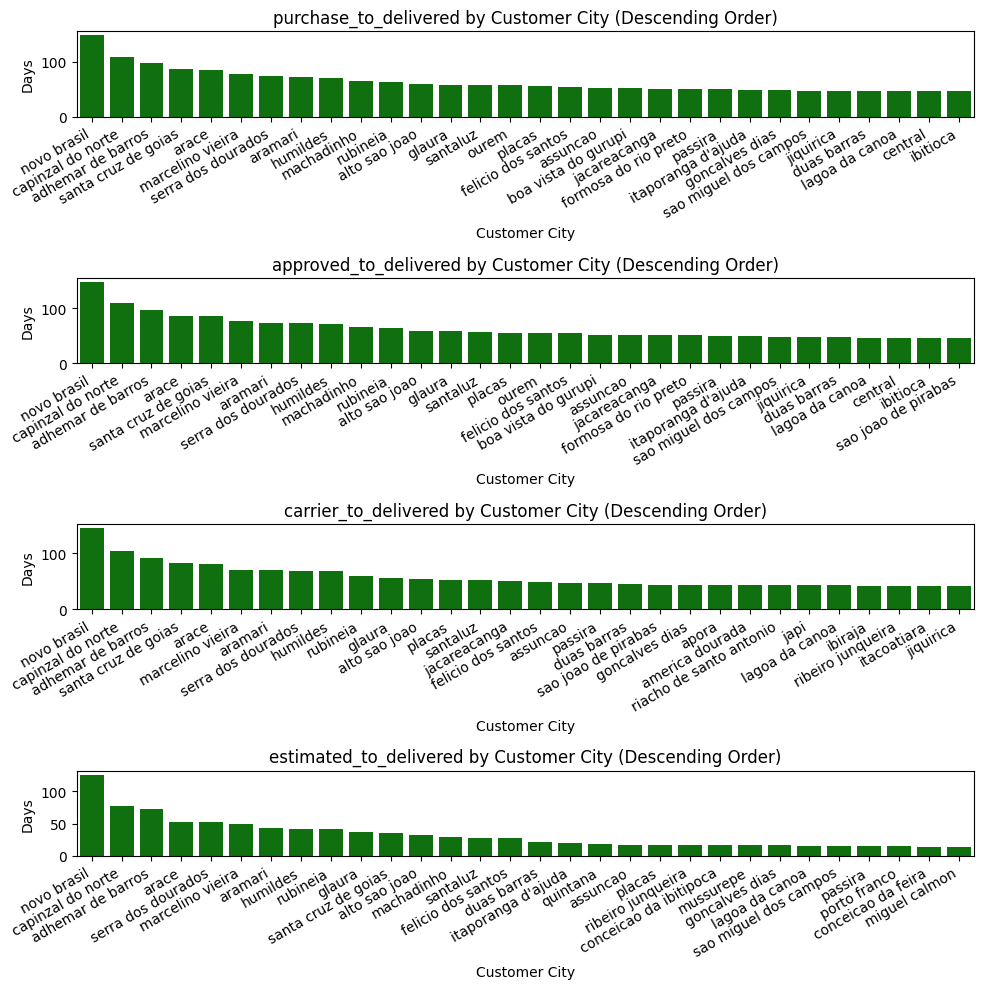

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

# List of columns to plot
columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

for ax, col in zip(axes, columns):
    # Sort the DataFrame by the current column (descending)
    sorted_df = df_subset_city.sort_values(by=col, ascending=False).head(30)

    # Create a barplot
    sns.barplot(data=sorted_df, x="customer_city", y=col, ax=ax, color="green")

    # Customize labels and title
    ax.set_title(f"{col} by Customer City (Descending Order)")
    ax.set_xlabel("Customer City")
    ax.set_ylabel("Days")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()
# Overalapping Labels : Change the axis - One Chart
# Rotation to labels : xticks --> one chart, set_xticklabels --> Subplot
# Barplot --> order in the x axis ( Categorical) -->
# order  ascending or Descending based on Continuous Var Which is used for analysing

Insights about Delivery time

- Novo brasil has the highest Delivery time in all aspects

- Top 3 (Novo brasil, Capinzal,Adhemar)




In [ ]:
# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

# # List of columns to plot
# columns = [
#     "purchase_to_delivered",
#     "approved_to_delivered",
#     "carrier_to_delivered",
#     "estimated_to_delivered"
# ]

# for ax, col in zip(axes, columns):
#     # Sort the DataFrame by the current column (descending)
#     sorted_df = df_subset_city.sort_values(by=col, ascending=True).head(30)

#     # Create a barplot
#     sns.barplot(data=sorted_df, x="customer_city", y=col, ax=ax, color="green")

#     # Customize labels and title
#     ax.set_title(f"{col} by Customer City (Descending Order)")
#     ax.set_xlabel("Customer City")
#     ax.set_ylabel("Days")
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

# plt.tight_layout()
# plt.show()

In [1]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# List of columns to plot
columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]


# Sort the DataFrame by the current column (descending)
sorted_df = df_subset_city.sort_values(by="purchase_to_delivered", ascending=False).head(30)

# Create a barplot
sns.barplot(data=sorted_df, x="customer_city", y="purchase_to_delivered", ax=axes[0], color="green")

# Customize labels and title
axes[0].set_title(f"purchase_to_delivered by Customer City (Descending Order)")
axes[0].set_xlabel("Customer City")
axes[0].set_ylabel("Days")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")




# Create a barplot
sns.barplot(data=sorted_df, x="customer_city", y="approved_to_delivered", ax=axes[1], color="green")

# Customize labels and title
axes[1].set_title(f"approved_to_delivered by Customer City (Descending Order)")
axes[1].set_xlabel("Customer City")
axes[1].set_ylabel("Days")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
1  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
2  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
3  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
1                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
2                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
3                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
4                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
1      2018-07-24 20:41:37    delivered          22.76              1  118.70   
2      2018-08-08 08:38:49    delivered          19.22              1  159.90   
3      2017-11-18 19:28:06    delivered          27.20              1   45.00   
4      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
1 2018-07-30 03:24:27       boleto             4             perfumaria   
2 2018-08-13 08:55:23  credit_card             5             automotivo   
3 2017-11-23 19:45:59  credit_card             5               pet_shop   
4 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
1               13.0               19.0             400.0              19.0   
2               19.0               24.0             420.0              21.0   
3               10.0               30.0             450.0              20.0   
4               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
1                barreiras             BA  af07308b275d755c9edb36a90c618231   
2               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
3  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
4              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
1                     47813   belo horizonte           SP   
2                     75265          guariba           SP   
3                     59296   belo horizonte           MG   
4                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
1                   31570

In [ ]:
## On time Vs Delayed Delivery Analysis
df_subset_city_total = df_subset['customer_city'].value_counts().reset_index()
df_subset_city_total.head() # Number of orders in the city

customer_city  count
0       sao paulo  17007
1  rio de janeiro   7405
2  belo horizonte   3021
3        brasilia   2306
4        curitiba   1706

In [ ]:
df_subset_city_delayed = df_subset.loc[df_subset['on_time_delivery'] == 'Delayed'].groupby(['customer_city']).agg({'on_time_delivery':'count'}).sort_values('on_time_delivery', ascending = False).reset_index()

df_subset_city_delayed.columns = ['customer_city', 'Delayed_delivery']
df_subset_city_delayed.head()

customer_city  Delayed_delivery
0       sao paulo               787
1  rio de janeiro               752
2        salvador               186
3  belo horizonte               150
4    porto alegre               146

In [ ]:
df_subset_city_final = pd.merge(df_subset_city_total,df_subset_city_delayed,on = 'customer_city', how = 'inner' )
df_subset_city_final.head()

customer_city  count  Delayed_delivery
0       sao paulo  17007               787
1  rio de janeiro   7405               752
2  belo horizonte   3021               150
3        brasilia   2306               141
4        curitiba   1706                65

In [ ]:
df_subset_city_final['Delayed_delivery_pct'] = round((df_subset_city_final['Delayed_delivery'] /df_subset_city_final['count']) * 100)
df_subset_city_final.head()

customer_city  count  Delayed_delivery  Delayed_delivery_pct
0       sao paulo  17007               787                   5.0
1  rio de janeiro   7405               752                  10.0
2  belo horizonte   3021               150                   5.0
3        brasilia   2306               141                   6.0
4        curitiba   1706                65                   4.0

In [ ]:
# percentage (%) : Always it's a better metric

In [ ]:
df_subset_city_final.sort_values('Delayed_delivery_pct', ascending = False)

customer_city  count  Delayed_delivery  Delayed_delivery_pct
1169    america dourada      1                 1                 100.0
1089              ajapi      1                 1                 100.0
1091           humildes      1                 1                 100.0
1092  santa rosa do sul      1                 1                 100.0
1093         machadinho      1                 1                 100.0
...                 ...    ...               ...                   ...
190            cacapava     81                 1                   1.0
95    braganca paulista    157                 2                   1.0
192               tatui     80                 1                   1.0
194          jaguariuna     80                 1                   1.0
217             pinhais     71                 1                   1.0

[1170 rows x 4 columns]

In [ ]:
df_city_barplot = df_subset_city_final['Delayed_delivery_pct'].value_counts().reset_index().sort_values('Delayed_delivery_pct', ascending = False)

In [ ]:
df_city_barplot.loc[df_city_barplot['Delayed_delivery_pct'] >10]

Delayed_delivery_pct  count
0                  100.0    111
44                  80.0      1
30                  75.0      4
41                  71.0      1
20                  67.0     17
45                  60.0      1
42                  57.0      1
39                  56.0      1
1                   50.0     75
34                  45.0      2
32                  44.0      3
29                  43.0      4
37                  42.0      1
25                  40.0      7
35                  38.0      2
38                  36.0      1
7                   33.0     56
40                  30.0      1
23                  29.0     10
36                  28.0      2
28                  27.0      5
43                  26.0      1
6                   25.0     58
46                  24.0      1
31                  23.0      3
24                  22.0      8
26                  21.0      6
11                  20.0     49
27                  19.0      6
22                  18.0     13
13                  17.0     47
33                  16.0      3
18                  15.0     20
14                  14.0     44
21                  13.0     16
16                  12.0     35
9                   11.0     54

In [ ]:
df_subset_city_final.loc[df_subset_city_final['Delayed_delivery_pct']>25].shape

(307, 4)

In [ ]:
df_subset_city_final.shape

(1170, 4)

#### Insights
For 300 Cities out of 1170 Cities - orders are delayed for More than 25%

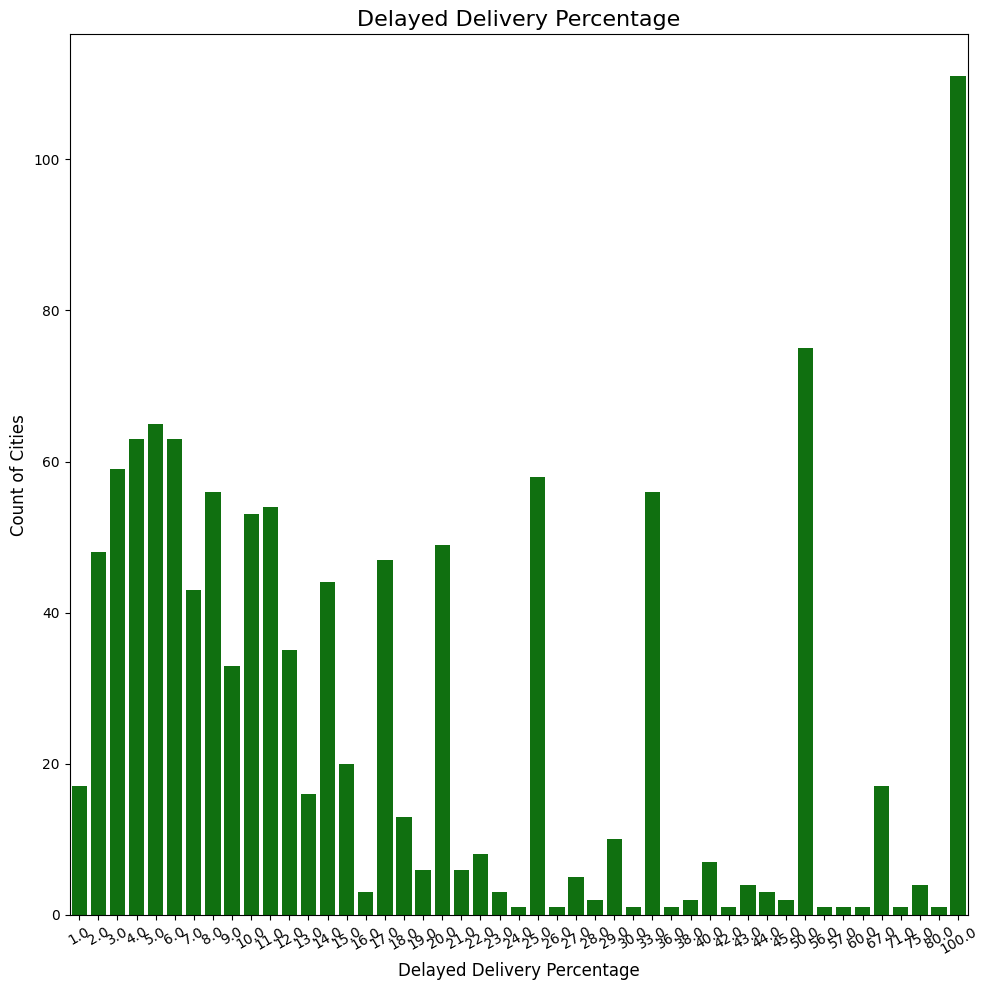

In [ ]:
# Barplot
plt.figure(figsize=(10, 10))  # Adjust figure size for better readability
sns.barplot(
    data=df_city_barplot,
    x="Delayed_delivery_pct",
    y="count",
    color="green"
)

# Customize the plot
plt.title("Delayed Delivery Percentage", fontsize=16)
plt.xlabel("Delayed Delivery Percentage", fontsize=12)
plt.ylabel("Count of Cities", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10, ha = 'right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [ ]:
df_subset_city_final.loc[df_subset_city_final['on_time_delivery_pct'] == 100,'customer_city'].unique()

array(['raposo', 'vila nelita', 'passira', 'buritirama',
       'sao joao de pirabas', 'aramari', 'maioba', 'itacoatiara',
       'placas', 'candido mendes', 'vargem grande do rio pardo', 'conde',
       'capinzal do norte', "itaporanga d'ajuda", 'rainha do mar',
       'polo petroquimico de triunfo', 'guinda', 'leoberto leal',
       'vila pereira', 'aguas claras', 'campo do tenente',
       'sede alvorada', 'paraju', 'severiano melo', 'igapora',
       'serra azul', 'portela', 'vicosa do ceara', 'atilio vivacqua',
       'ribeiro junqueira', 'ajapi', 'inhuma', 'humildes',
       'santa rosa do sul', 'machadinho', 'bertopolis', 'jacareacanga',
       'japi', 'jequeri', 'jacuizinho', 'duas barras',
       'sao pedro do iguacu', 'mussurepe', 'serra dos dourados',
       'tabuleiro do norte', 'rubineia', 'santa quiteria do maranhao',
       'sao mateus de minas', 'lagoa da canoa', 'valao do barro',
       'gilbues', 'marcelino vieira', 'apora', 'aroeiras', 'jucas',
       'novo brasil', 

##### Insights


###### Seller Location (City)

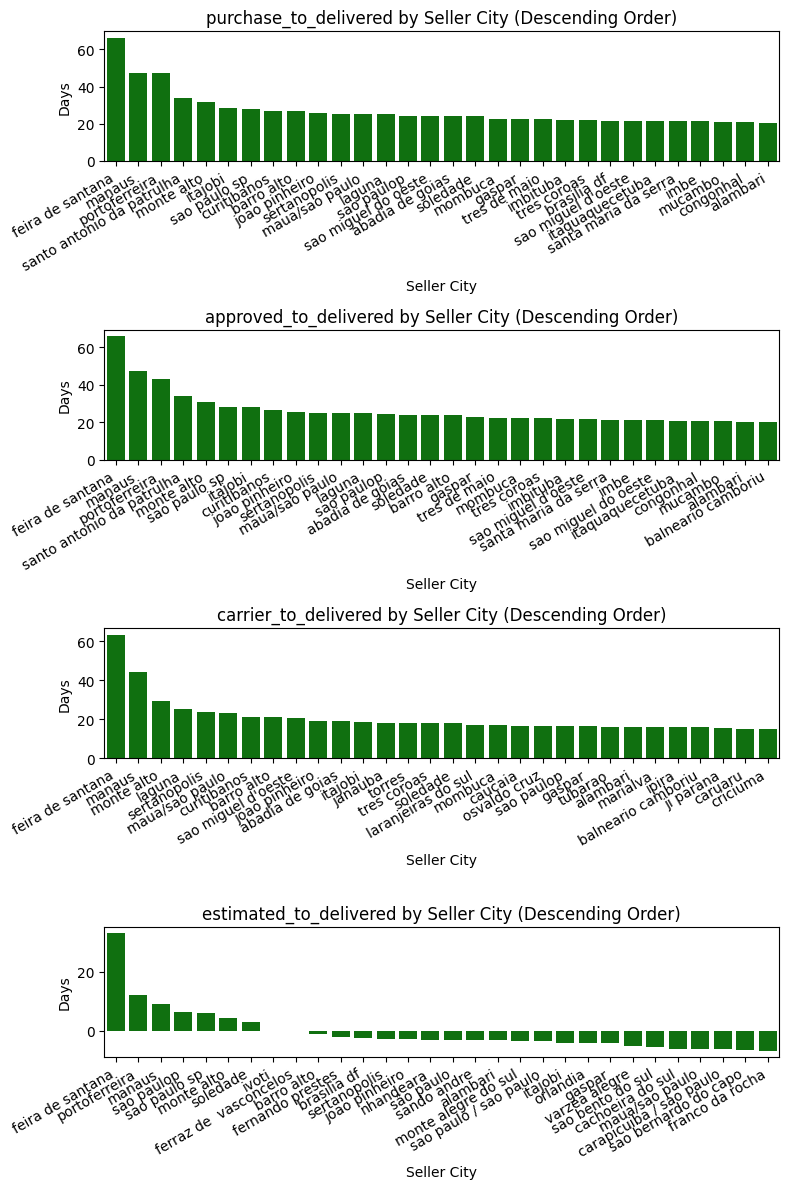

In [ ]:
df_subset_s_city = df_subset.groupby(['seller_city']).agg({'purchase_to_delivered':'mean','approved_to_delivered':'mean','carrier_to_delivered':'mean','estimated_to_delivered':'mean'}).sort_values('approved_to_delivered', ascending = False).reset_index()
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 12))

# List of columns to plot
columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

for ax, col in zip(axes, columns):
    # Sort the DataFrame by the current column (descending)
    sorted_df = df_subset_s_city.sort_values(by=col, ascending=False).head(30)

    # Create a barplot
    sns.barplot(data=sorted_df, x="seller_city", y=col, ax=ax, color="green")

    # Customize labels and title
    ax.set_title(f"{col} by Seller City (Descending Order)")
    ax.set_xlabel("Seller City")
    ax.set_ylabel("Days")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()

##### Insights
1. Worst Performing Seller City  : Fiera De Santana

2. Top 3 Cities

In [ ]:
# Top3 Cities : Sellers | Top Sellers contributing to Delays
# Top3 Cities : Product Order

#### Category 3 : Product Characteristics vs Delivery time

1. Product Volume vs Delivery time

2. Product vs Delivery time

3. Product Category vs Delivery time

4. Product Weight vs Delivery time

5. Product Quantity vs Delivery time

6. Rating of product vs Delivery time

7. Product Price vs Delivery time

In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om'],
      dtype='object')

##### Product Volume Vs Delivery Time

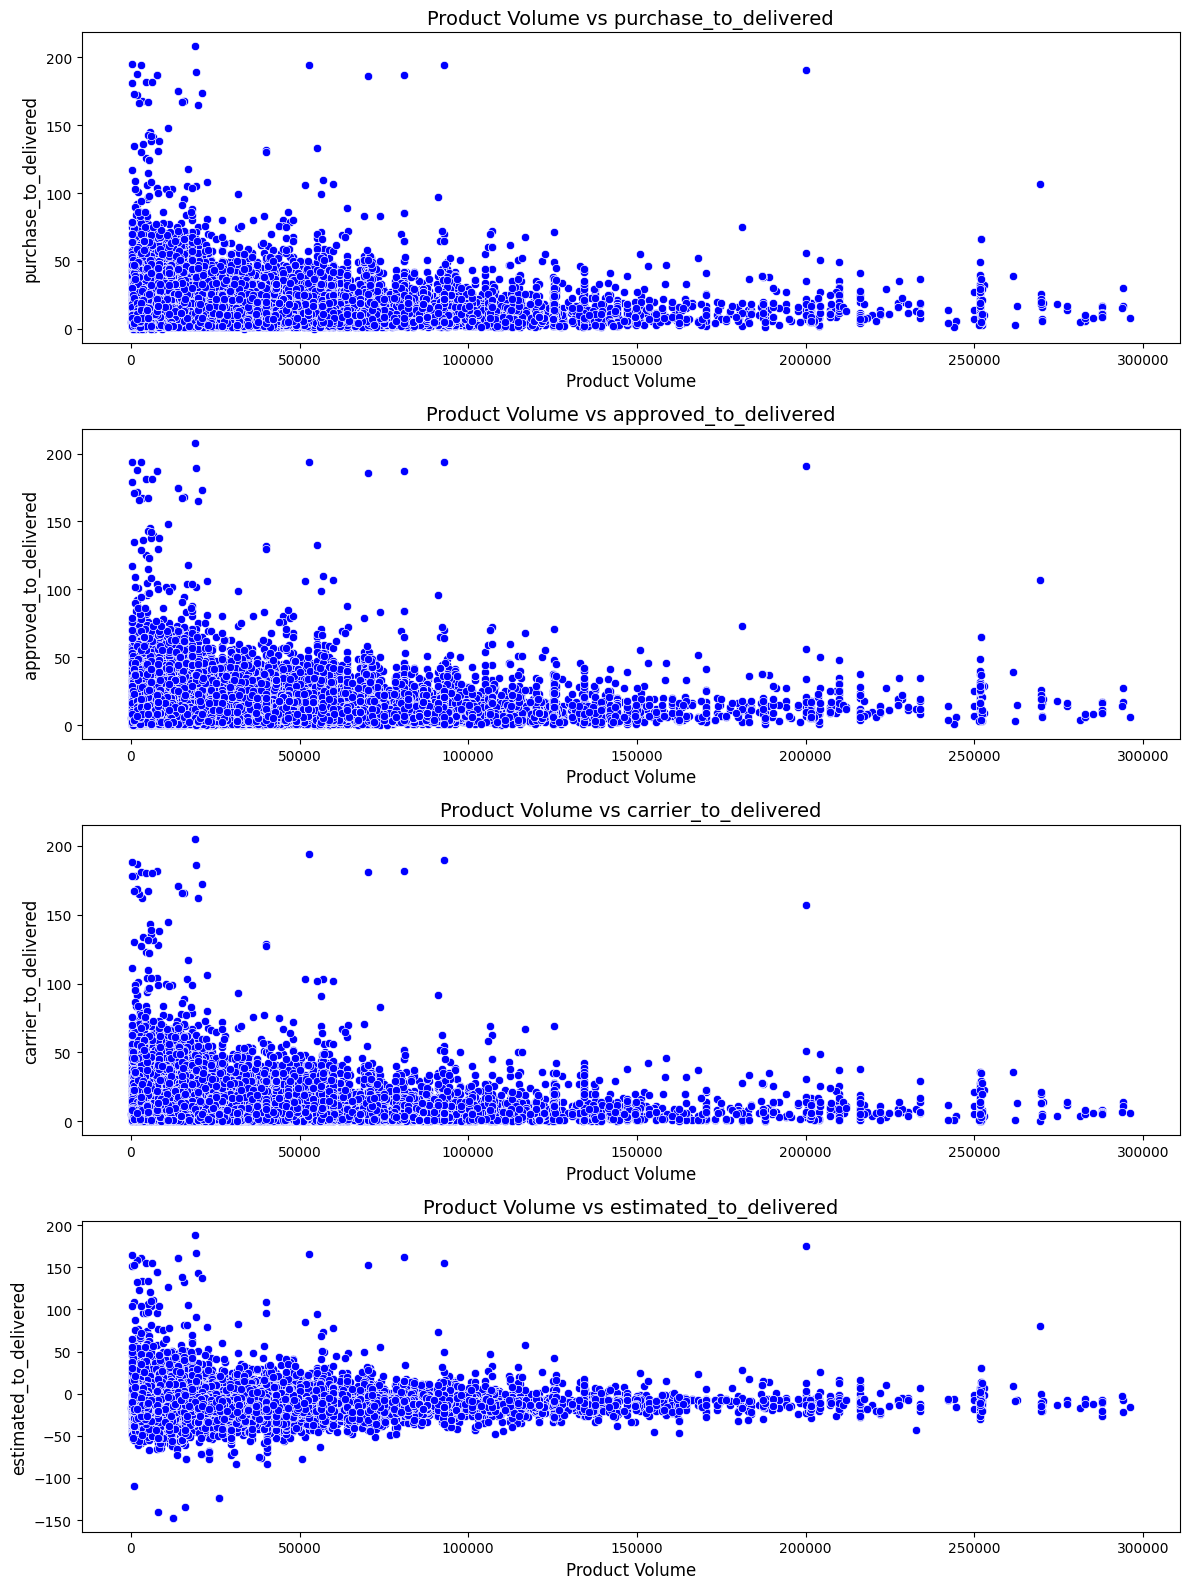

In [ ]:
# Product Volume vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=False, sharey=False)

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    sns.scatterplot(data=df_subset, x="Product_volume", y=col, ax=axes[i], color="blue")
    axes[i].set_title(f"Product Volume vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Volume", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Add space between plots
plt.tight_layout()
plt.show()
#

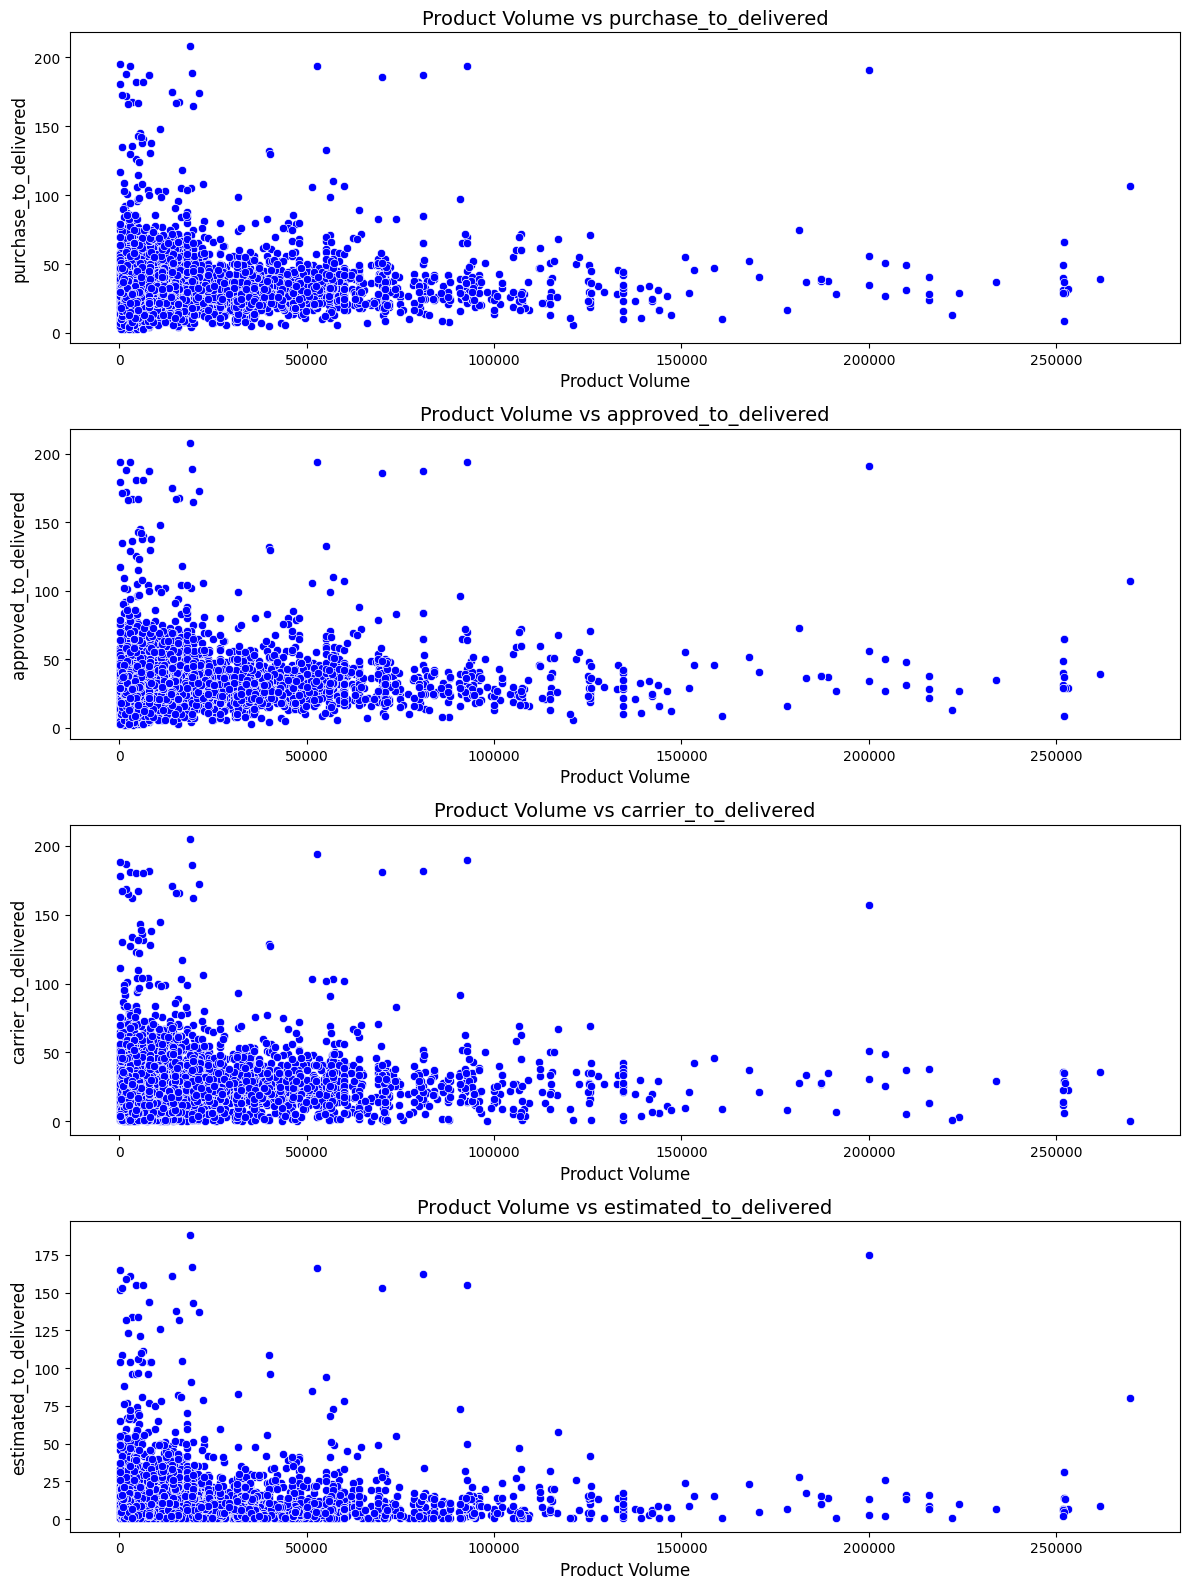

In [ ]:
# Product Volume vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=False, sharey=False)

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    sns.scatterplot(data=df_subset[df_subset['on_time_delivery'] =='Delayed'], x="Product_volume", y=col, ax=axes[i], color="blue")
    axes[i].set_title(f"Product Volume vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Volume", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Add space between plots
plt.tight_layout()
plt.show()

In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om'],
      dtype='object')

##### Product Category vs Delivery time



In [ ]:
# Product Category Name in English
productcategoryname_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
productcategoryname_df.drop_duplicates(inplace= True)
# If Duplicates are present : After merging with base data : Final Data will have the duplicates

###### Best Practice :
1. When you try to merge other data with base data(Data we are using for Analysis) --> Do Drop Duplicates for other Data

2. Mostly you will do left join with the base data (Data you are  using for Analysis)

In [ ]:
df_subset = pd.merge(df_subset,productcategoryname_df, on = 'product_category_name', how = 'left' )

In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
1  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
2  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
3  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
1                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
2                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
3                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
4                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
1      2018-07-24 20:41:37    delivered          22.76              1  118.70   
2      2018-08-08 08:38:49    delivered          19.22              1  159.90   
3      2017-11-18 19:28:06    delivered          27.20              1   45.00   
4      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
1 2018-07-30 03:24:27       boleto             4             perfumaria   
2 2018-08-13 08:55:23  credit_card             5             automotivo   
3 2017-11-23 19:45:59  credit_card             5               pet_shop   
4 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
1               13.0               19.0             400.0              19.0   
2               19.0               24.0             420.0              21.0   
3               10.0               30.0             450.0              20.0   
4               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
1                barreiras             BA  af07308b275d755c9edb36a90c618231   
2               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
3  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
4              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
1                     47813   belo horizonte           SP   
2                     75265          guariba           SP   
3                     59296   belo horizonte           MG   
4                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
1                   31570

In [ ]:
#
# df_subset.drop(['product_category_name_english_y','product_category_name_english_x'], axis = 1, inplace = True)

In [ ]:
# df_subset[df_subset['on_time_delivery'] =='Delayed'].product_category_name_english.value_counts()

product_category_name_english
bed_bath_table                             750
health_beauty                              692
furniture_decor                            559
sports_leisure                             523
computers_accessories                      486
watches_gifts                              412
housewares                                 331
telephony                                  304
auto                                       286
garden_tools                               274
toys                                       246
baby                                       223
perfumery                                  215
cool_stuff                                 212
electronics                                205
stationery                                 165
office_furniture                           132
fashion_bags_accessories                   104
pet_shop                                    93
consoles_games                              60
construction_tools_construction             56
musical_instruments                         48
luggage_accessories                         44
audio                                       41
home_confort                                40
home_construction                           35
food                                        34
home_appliances                             34
furniture_living_room                       33
books_general_interest                      32
small_appliances                            29
construction_tools_lights                   22
books_technical                             21
drinks                                      16
industry_commerce_and_business              15
home_appliances_2                           14
costruction_tools_garden                    13
fashion_underwear_beach                     12
kitchen_dining_laundry_garden_furniture     12
art                                         12
market_place                                11
food_drink                                  11
fashion_shoes                               10
air_conditioning                            10
fixed_telephony                              9
christmas_supplies                           9
computers                                    8
furniture_bedroom                            7
agro_industry_and_commerce                   7
signaling_and_security                       7
fashion_male_clothing                        6
furniture_mattress_and_upholstery            5
costruction_tools_tools                      5
construction_tools_safety                    5
small_appliances_home_oven_and_coffee        4
tablets_printing_image                       4
dvds_blu_ray                                 4
home_comfort_2                               4
cine_photo                                   4
fashio_female_clothing                       3
music                                        2
books_imported                               2
arts_and_craftmanship                        1
fashion_sport                                1
flowers                                      1
Name: count, dtype: int64

In [ ]:
df_subset_product_cat = df_subset.groupby('product_category_name_english').agg({
     "purchase_to_delivered" :'mean',
    "approved_to_delivered": 'mean',
    "carrier_to_delivered":'mean',
    "estimated_to_delivered" :'mean'

}).reset_index()
df_subset_product_cat.head()

product_category_name_english  purchase_to_delivered  approved_to_delivered  \
0    agro_industry_and_commerce              11.223301              10.359223   
1              air_conditioning              11.739437              11.186620   
2                           art              10.829897              10.262887   
3         arts_and_craftmanship               5.291667               4.500000   
4                         audio              12.883008              12.389972   

   carrier_to_delivered  estimated_to_delivered  
0              7.893204              -11.461165  
1              7.517606              -14.271127  
2              6.886598              -12.773196  
3              3.125000               -6.791667  
4              9.896936              -10.091922

In [ ]:
# df_subset_product_cat.sort_values(by = "purchase_to_delivered", ascending = False)

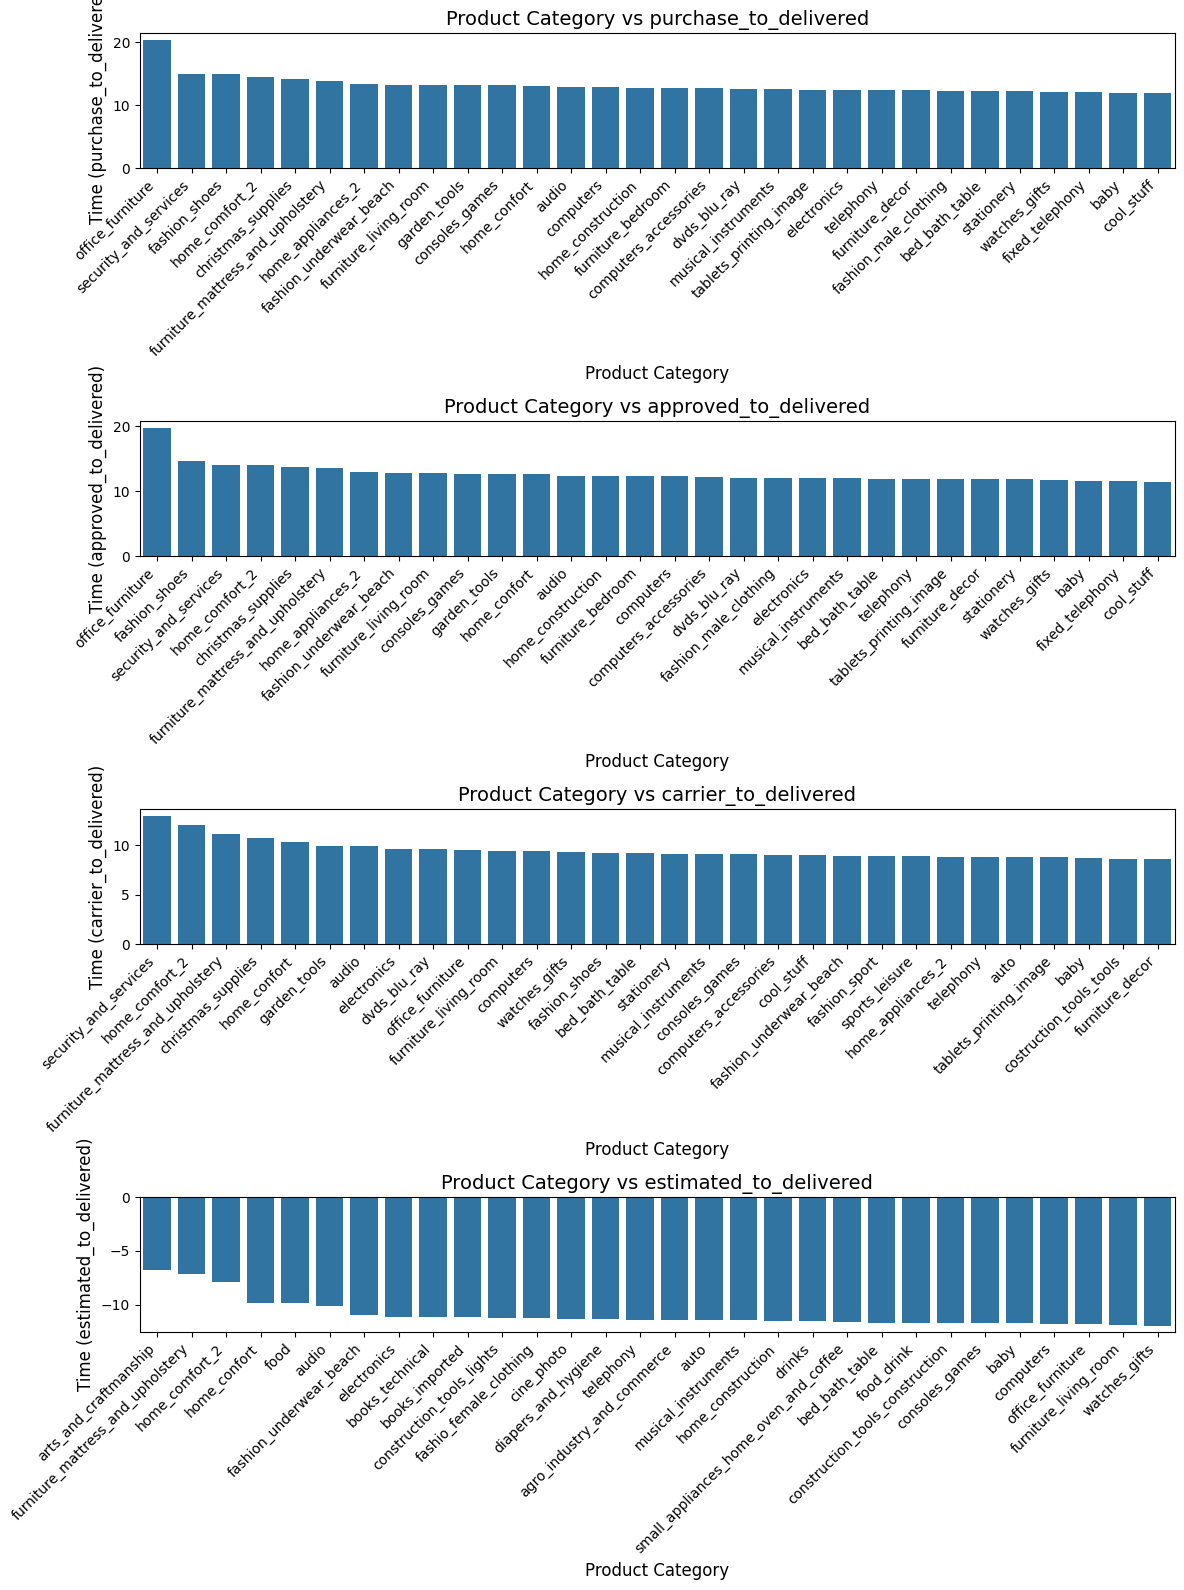

In [ ]:
# Product Category vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    df_sorted = df_subset_product_cat.sort_values(by = col, ascending = False).head(30)
    sns.barplot(
            data=df_sorted,
            x="product_category_name_english",
            y=col,
            ax=axes[i]
        )
    axes[i].set_title(f"Product Category vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Category", fontsize=12)
    axes[i].set_ylabel(f"Time ({col})", fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Add space between plots
plt.tight_layout()
plt.show()

Insights -
1. office Firniture Category is taking most time.
2. Top 3 - Office Furniture, Fashion Shoes, Security and Services

In [ ]:
df_subset_product_cat_del = df_subset[df_subset['on_time_delivery'] =='Delayed'].groupby('product_category_name_english').agg({
     "purchase_to_delivered" :'mean',
    "approved_to_delivered": 'mean',
    "carrier_to_delivered":'mean',
    "estimated_to_delivered" :'mean'

}).reset_index()
df_subset_product_cat_del.head()

product_category_name_english  purchase_to_delivered  approved_to_delivered  \
0    agro_industry_and_commerce              36.000000              35.571429   
1              air_conditioning              35.300000              34.800000   
2                           art              17.916667              16.666667   
3         arts_and_craftmanship              21.000000              17.000000   
4                         audio              31.756098              31.121951   

   carrier_to_delivered  estimated_to_delivered  
0             30.857143               11.285714  
1             26.000000               14.200000  
2              8.833333                3.166667  
3             17.000000                4.000000  
4             27.707317                8.268293

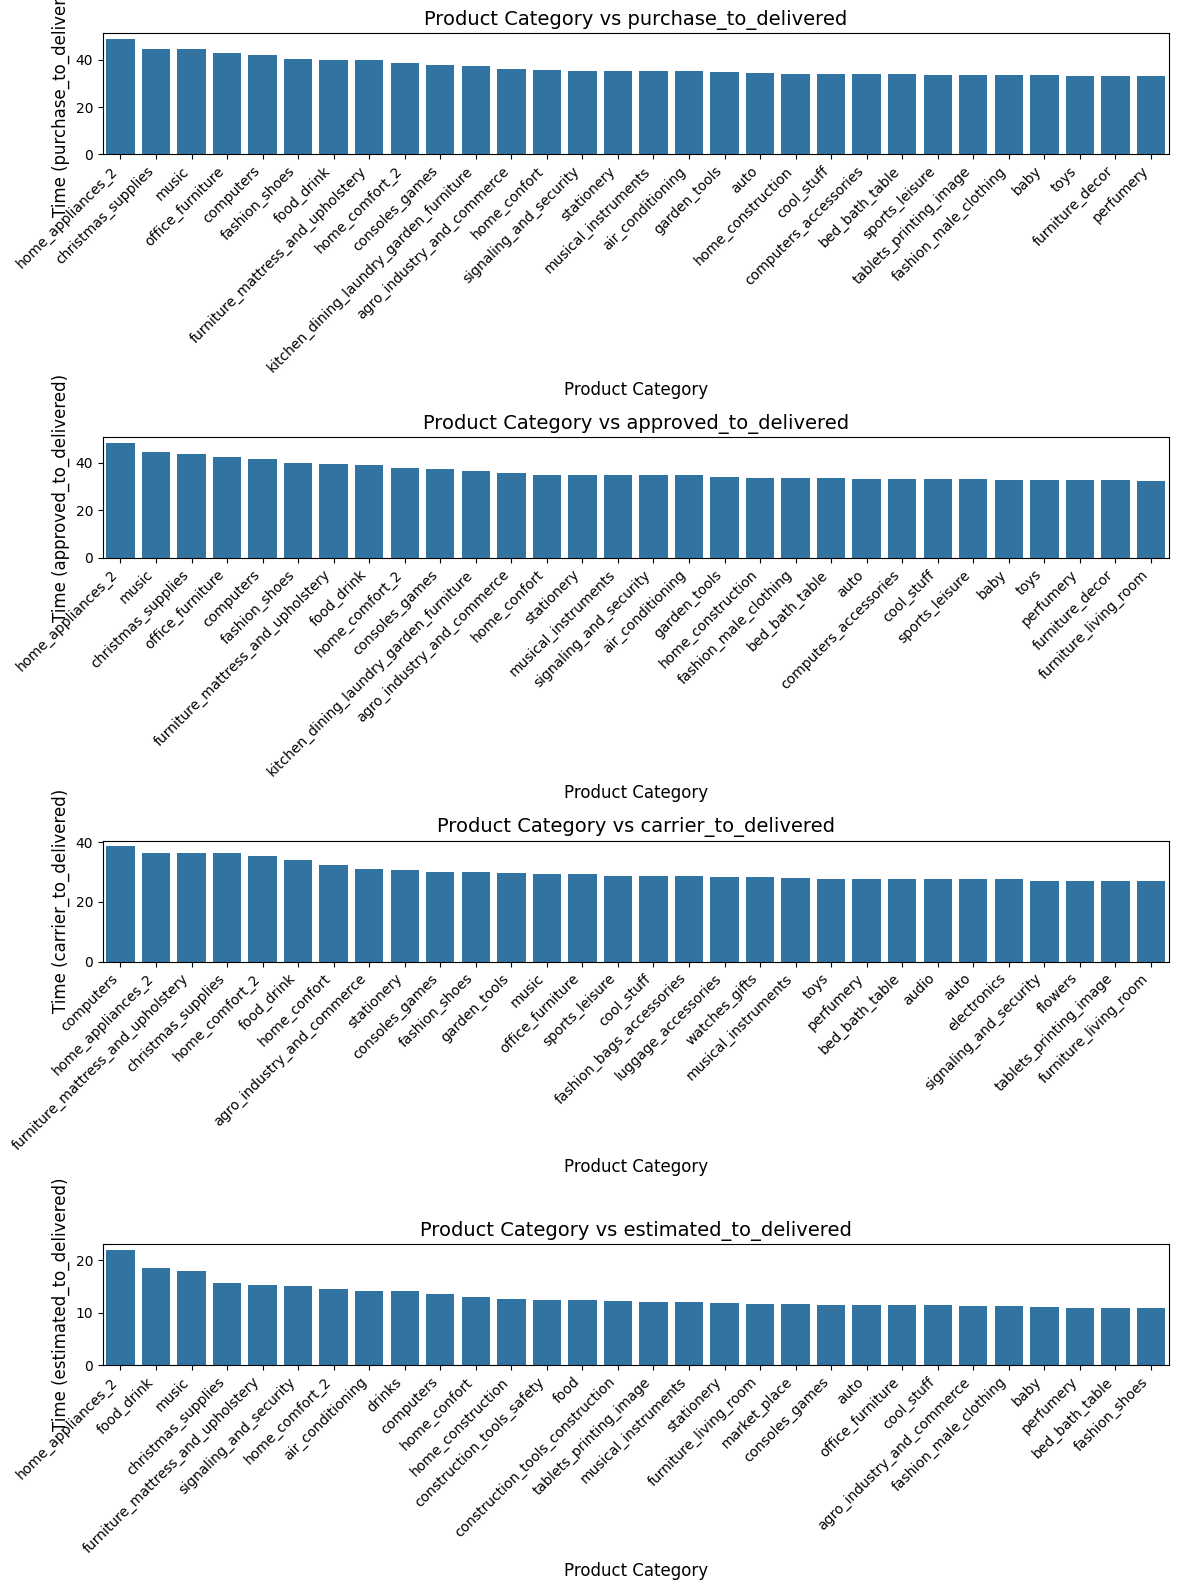

In [ ]:
# Product Category vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    df_sorted = df_subset_product_cat_del.sort_values(by = col, ascending = False).head(30)
    sns.barplot(
            data=df_sorted,
            x="product_category_name_english",
            y=col,
            ax=axes[i]
        )
    axes[i].set_title(f"Product Category vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Category", fontsize=12)
    axes[i].set_ylabel(f"Time ({col})", fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Add space between plots
plt.tight_layout()
plt.show()

##### Insights
Average time to deliver for Delayed Order
1. Top Category Home Appliances


In [ ]:
df_subset_sorted = df_subset[df_subset['on_time_delivery'] =='Delayed'].groupby('product_category_name_english').agg({"purchase_to_delivered":'median',
    "approved_to_delivered": 'median',
    "carrier_to_delivered" : 'median',
    "estimated_to_delivered": 'median'}).reset_index().sort_values(by = 'estimated_to_delivered', ascending = False).head(20)

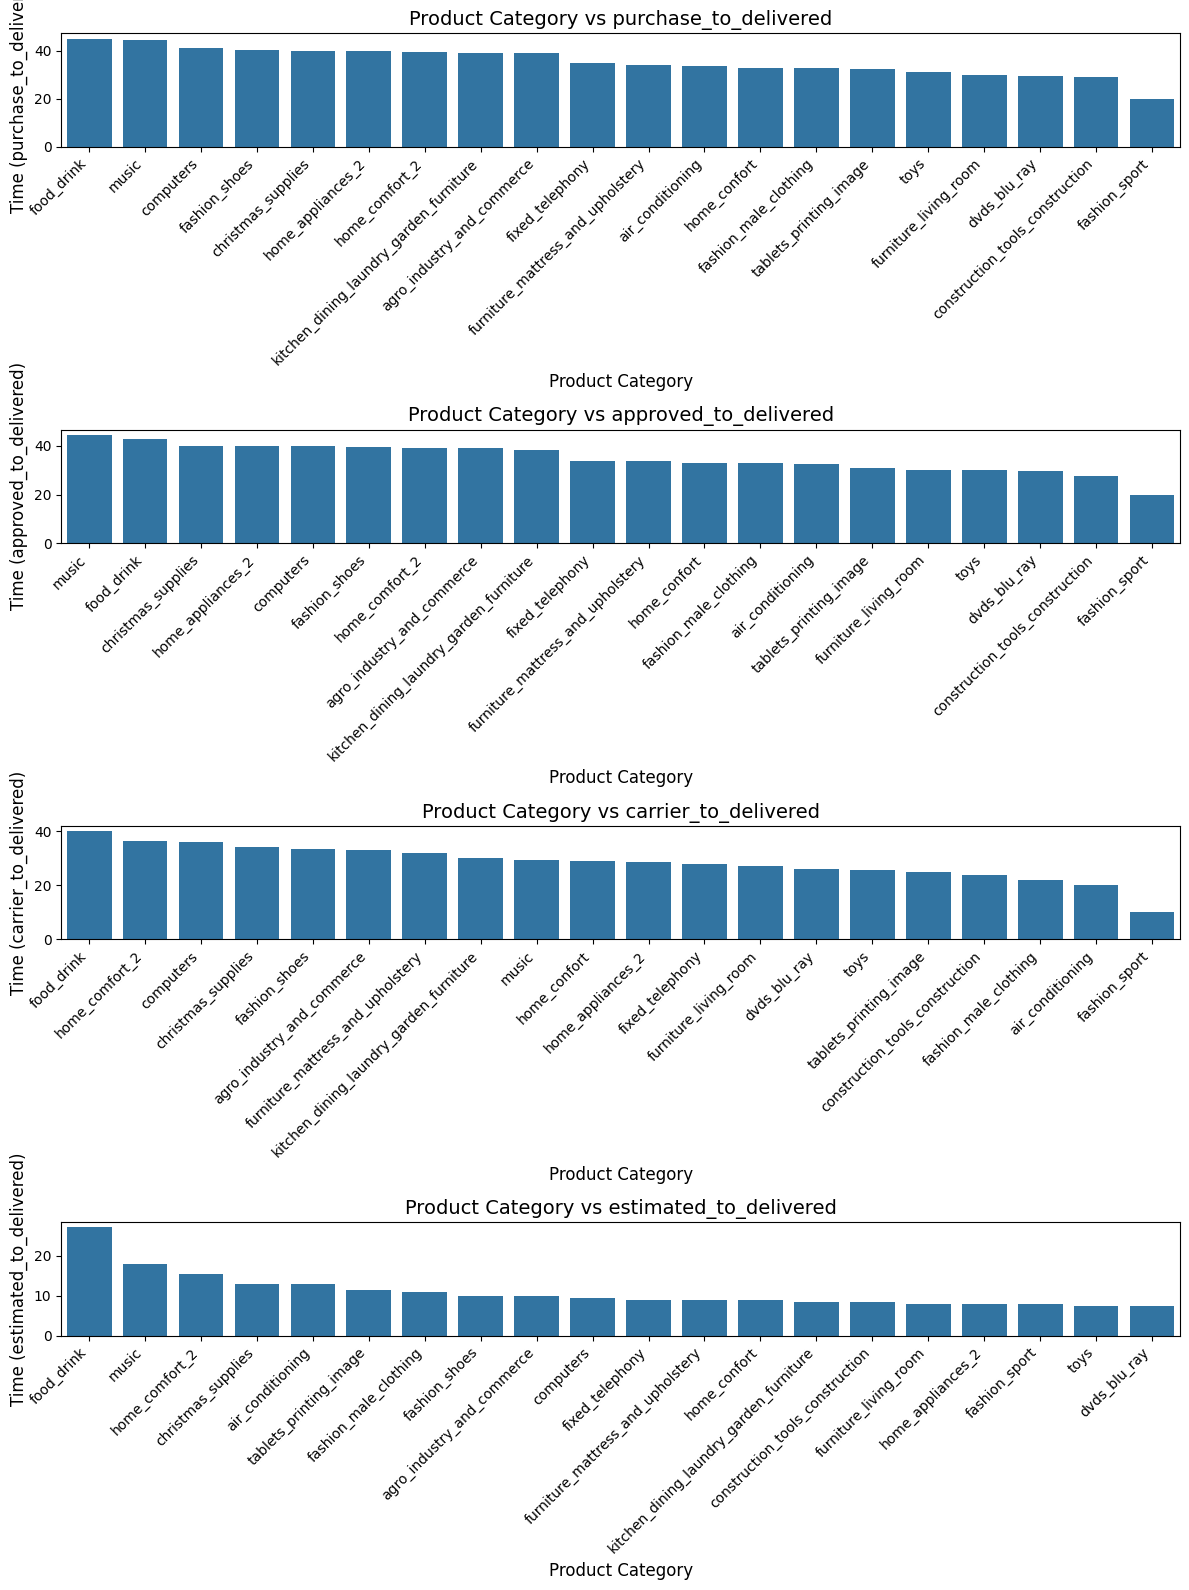

In [ ]:
# Product Category vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    df_sorted = df_subset_sorted.sort_values(by = col, ascending = False)
    sns.barplot(
            data=df_sorted,
            x="product_category_name_english",
            y=col,
            ax=axes[i]
        )
    axes[i].set_title(f"Product Category vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Category", fontsize=12)
    axes[i].set_ylabel(f"Time ({col})", fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Add space between plots
plt.tight_layout()
plt.show()

##### Product Weight vs Delivery time


In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om', 'product_category_name_english'],
      dtype='object')

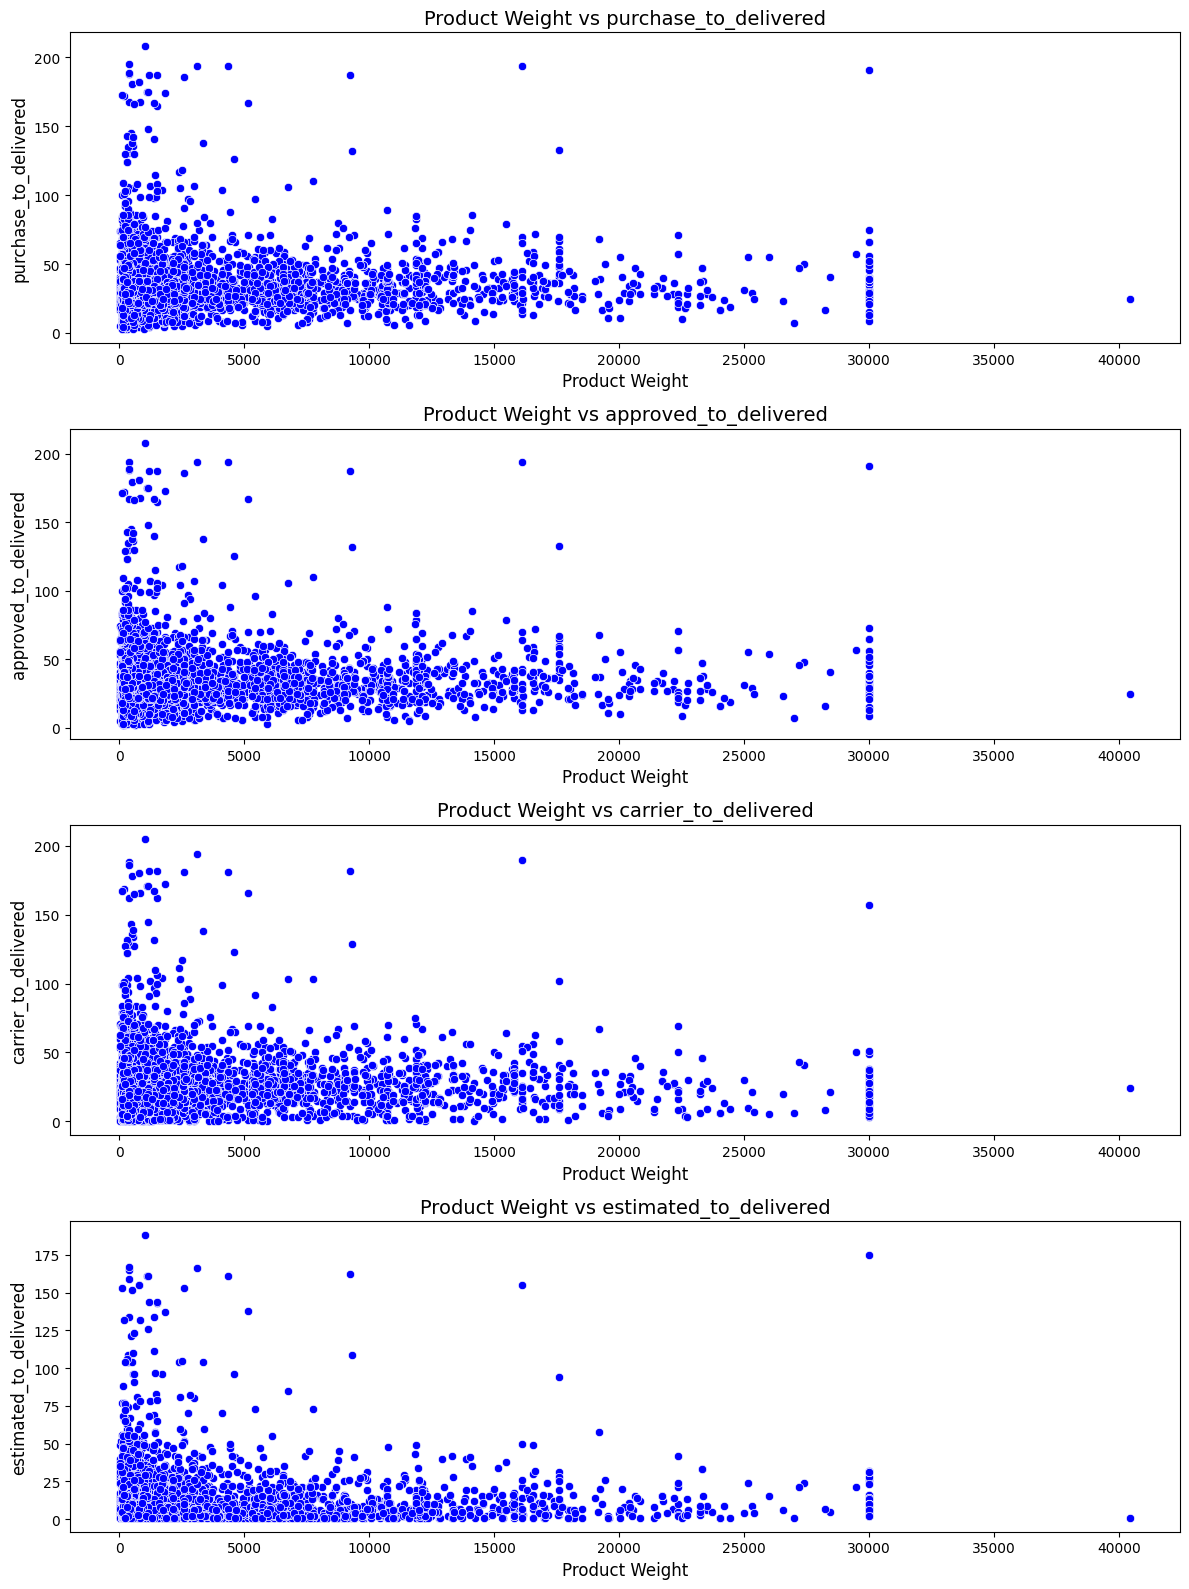

In [ ]:
# Product Weight vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=False, sharey=False)

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    sns.scatterplot(data=df_subset[df_subset['on_time_delivery'] =='Delayed'], x="product_weight_g", y=col, ax=axes[i], color="blue")
    axes[i].set_title(f"Product Weight vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Weight", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Add space between plots
plt.tight_layout()
plt.show()

##### Product Quantity vs Delivery time



In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om', 'product_category_name_english'],
      dtype='object')

In [ ]:
df_subset.head()

customer_id   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
1  b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
2  41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
3  f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                          order_id  \
0                    2017-10-18  e481f51cbdc54678b7cc49136f2d6af7   
1                    2018-08-13  53cdb2fc8bc7dce0b6741e2150273451   
2                    2018-09-04  47770eb9100c2d0c44946d9cf07ec65d   
3                    2017-12-15  949d5b44dbf5de918fe9c16f97b45f8a   
4                    2018-02-26  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp order_status  freight_value  order_item_id   price  \
0      2017-10-02 10:56:33    delivered           8.72              1   29.99   
1      2018-07-24 20:41:37    delivered          22.76              1  118.70   
2      2018-08-08 08:38:49    delivered          19.22              1  159.90   
3      2017-11-18 19:28:06    delivered          27.20              1   45.00   
4      2018-02-13 21:18:39    delivered           8.72              1   19.90   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date payment_type  review_score  product_category_name  \
0 2017-10-06 11:07:15  credit_card             4  utilidades_domesticas   
1 2018-07-30 03:24:27       boleto             4             perfumaria   
2 2018-08-13 08:55:23  credit_card             5             automotivo   
3 2017-11-23 19:45:59  credit_card             5               pet_shop   
4 2018-02-19 20:31:37  credit_card             5              papelaria   

   product_height_cm  product_length_cm  product_weight_g  product_width_cm  \
0                8.0               19.0             500.0              13.0   
1               13.0               19.0             400.0              19.0   
2               19.0               24.0             420.0              21.0   
3               10.0               30.0             450.0              20.0   
4               15.0               51.0             250.0              15.0   

             customer_city customer_state                customer_unique_id  \
0                sao paulo             SP  7c396fd4830fd04220f754e42b4e5bff   
1                barreiras             BA  af07308b275d755c9edb36a90c618231   
2               vianopolis             GO  3a653a41f6f9fc3d2a113cf8398680e8   
3  sao goncalo do amarante             RN  7c142cf63193a1473d2e66489a9ae977   
4              santo andre             SP  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix      seller_city seller_state  \
0                      3149             maua           SP   
1                     47813   belo horizonte           SP   
2                     75265          guariba           SP   
3                     59296   belo horizonte           MG   
4                      9195  mogi das cruzes           SP   

   seller_zip_code_prefix  purchase_to_delivered  approved_to_delivered  \
0                    9350                      8                      8   
1                   31570

In [ ]:
df_subset_order_item = df_subset.loc[df_subset['on_time_delivery'] =='Delayed'].groupby('order_id').agg({'order_item_id':'count',
    "purchase_to_delivered":'median',
    "approved_to_delivered":'median',
    "carrier_to_delivered":'median',
    "estimated_to_delivered":'median'}).reset_index()

In [ ]:
df_subset_order_item.head()

order_id  order_item_id  purchase_to_delivered  \
0  000e906b789b55f64edcb1f84030f90d              1                   17.0   
1  0017afd5076e074a48f1f1a4c7bac9c5              1                   46.0   
2  001c85b5f68d2be0cb0797afc9e8ce9a              1                   27.0   
3  001d8f0e34a38c37f7dba2a37d4eba8b              2                   11.0   
4  0030d783f979fbc5981e75613b057344              1                   42.0   

   approved_to_delivered  carrier_to_delivered  estimated_to_delivered  
0                   17.0                  16.0                     2.0  
1                   46.0                  35.0                     4.0  
2                   27.0                  25.0                     8.0  
3                   11.0                   1.0                     2.0  
4                   42.0                  21.0                    22.0

In [ ]:
df_subset_order_item_f = df_subset_order_item.groupby('order_item_id').agg({
    'order_id':'count',
    "purchase_to_delivered":'median',
    "approved_to_delivered":'median',
    "carrier_to_delivered":'median',
    "estimated_to_delivered":'median'}).reset_index()

In [ ]:
df_subset_order_item_f.columns

Index(['order_item_id', 'order_id', 'purchase_to_delivered',
       'approved_to_delivered', 'carrier_to_delivered',
       'estimated_to_delivered'],
      dtype='object')

In [ ]:
df_subset_order_item_f

order_item_id  order_id  purchase_to_delivered  approved_to_delivered  \
0              1      5794                   31.0                   30.0   
1              2       387                   29.0                   29.0   
2              3        58                   29.0                   28.5   
3              4        21                   35.0                   34.0   
4              5         9                   33.0                   33.0   
5              6        14                   23.0                   20.5   
6             21         1                   14.0                   13.0   

   carrier_to_delivered  estimated_to_delivered  
0                  26.0                     7.0  
1                  23.0                     6.0  
2                  22.0                     5.0  
3                  27.0                     7.0  
4                  28.0                     6.0  
5                   7.0                     6.0  
6                  11.0                     3.0

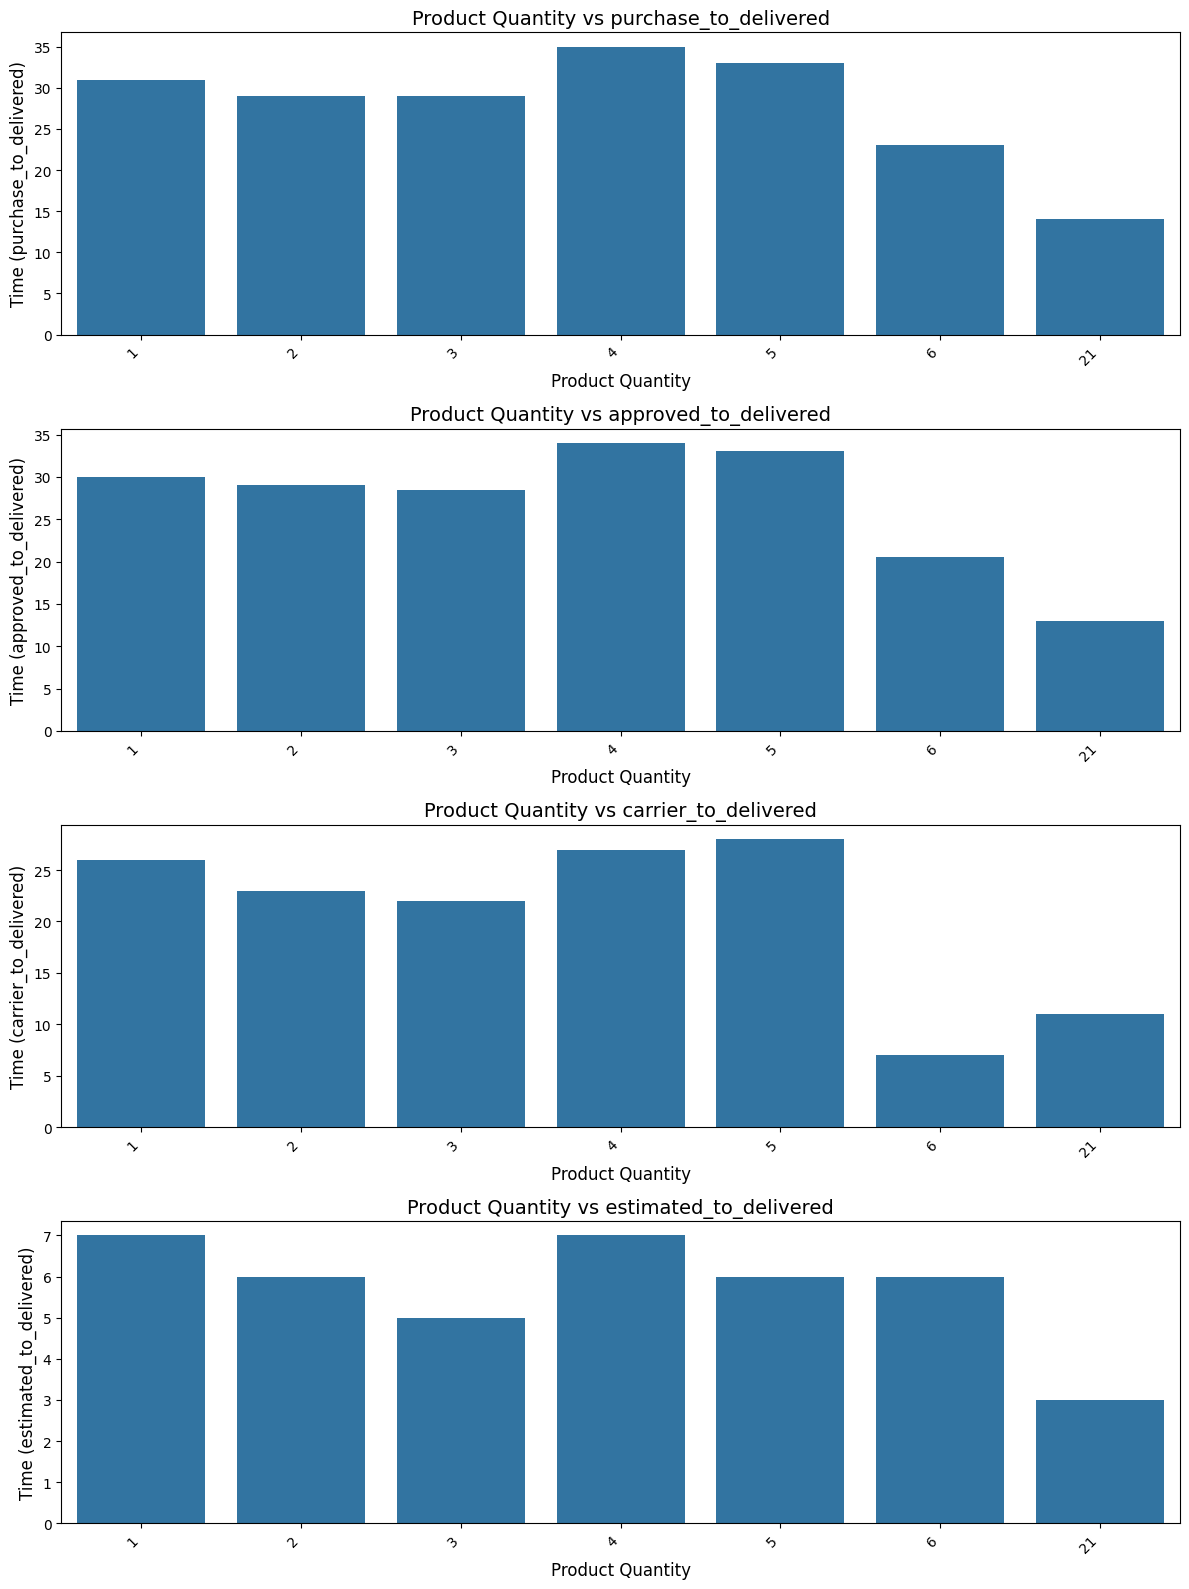

In [ ]:
# Product Quantity vs Delivery time
time_columns = [
    "purchase_to_delivered",
    "approved_to_delivered",
    "carrier_to_delivered",
    "estimated_to_delivered"
]

# Create a 4x1 grid of scatterplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Loop through the time_columns and corresponding axes
for i, col in enumerate(time_columns):
    sns.barplot(
            data=df_subset_order_item_f,
            x="order_item_id",
            y=col,
            ax=axes[i]
        )
    axes[i].set_title(f"Product Quantity vs {col}", fontsize=14)
    axes[i].set_xlabel("Product Quantity", fontsize=12)
    axes[i].set_ylabel(f"Time ({col})", fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Add space between plots
plt.tight_layout()
plt.show()

##### Rating of product vs Delivery time


In [ ]:
df_subset.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_type', 'review_score',
       'product_category_name', 'product_height_cm', 'product_length_cm',
       'product_weight_g', 'product_width_cm', 'customer_city',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_zip_code_prefix',
       'purchase_to_delivered', 'approved_to_delivered',
       'carrier_to_delivered', 'estimated_to_delivered', 'on_time_delivery',
       'Product_volume', 'approved_to_delivered_om',
       'purchase_to_delivered_om', 'carrier_to_delivered_om',
       'estimated_to_delivered_om', 'product_category_name_english'],
      dtype='object')

In [ ]:
df_subset.loc[df_subset['on_time_delivery'] =='Delayed','review_score'].value_counts()

review_score
1    3790
5    1156
3     745
4     696
2     589
Name: count, dtype: int64